<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/M08-deep-learning/AT%26T_logo_2016.svg" alt="AT&T LOGO" width="50%" />

# Orange SPAM detector

## Company's Description 📇

AT&T Inc. is an American multinational telecommunications holding company headquartered at Whitacre Tower in Downtown Dallas, Texas. It is the world's largest telecommunications company by revenue and the third largest provider of mobile telephone services in the U.S. As of 2022, AT&T was ranked 13th on the Fortune 500 rankings of the largest United States corporations, with revenues of $168.8 billion! 😮

## Project 🚧

One of the main pain point that AT&T users are facing is constant exposure to SPAM messages.

AT&T has been able to manually flag spam messages for a time, but they are looking for an automated way of detecting spams to protect their users.

## Goals 🎯

Your goal is to build a spam detector, that can automatically flag spams as they come based solely on the sms' content.

## Scope of this project 🖼️

To start off, AT&T would like you to use the folowing dataset:

[Dowload the Dataset](https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+Learning/project/spam.csv)

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you:

### Start simple
A good deep learing model does not necessarily have to be super complicated!

### Transfer learning
You do not have access to a whole lot of data, perhaps channeling the power of a more sophisticated model trained on billions of observations might help!

## Deliverable 📬

To complete this project, your team should:

* Write a notebook that runs preprocessing and trains one or more deep learning models in order to predict the spam or ham nature of the sms
* State the achieved performance clearly

#   Plan

1.  Introduction
2.  Importing Libraries
3.  Importing AT&T dataset
4.  Exploratory Data Analysis
5.  Preprocessing
    -   Tokenizing
    -   Padding
    -   Train test split
6. Simple model
    -   Class weight
    -   Compiler
    -   Training
    -   Accuracy results
    -   Additional metrics
    -   model's performance
7. Complex model
    -   Compiler
    -   Training
    -   Model's performance
8. Regularised Model
    -   Regularisation L1 Lasso
    -   Regularisation L2 Ridge
    -   Models' performances
9. Oversampling
    -   Oversampling Train set
    -   Simple Model oversampled
    -   Complex Model oversampeld
    -   L1 Model oversampled
    -   L2 Model oversampled
    -   Models' performances
10. Conclusion

#  1.   Introduction

This notebook aims to address the challenge of spam message detection faced by AT&T users. AT&T Inc., the world's largest telecommunications company, seeks an automated solution to efficiently identify and flag spam messages, enhancing the security and experience of its users. Utilizing a dataset provided by AT&T, which comprises SMS messages labeled as 'spam' or 'ham,' our goal is to develop a deep learning-based spam detector.

Approach:

We will start with basic deep learning models and gradually incorporate regularization techniques, such as Lasso (L1 regularization) and Ridge (L2 regularization), to improve the model's ability to generalize and reduce overfitting. This approach allows us to compare the effectiveness of simple models against those enhanced with regularization in accurately detecting spam messages.

By focusing on the content of SMS messages, the developed models aim to automate the spam detection process, potentially offering a scalable and reliable solution for AT&T and its users.

In order to organise this projet, it was split into several parts;

# 2.    Importing Libraries

In [65]:
#Download en_core_web_sm
#python -m spacy download en_core_web_sm

In [66]:
#pip install WordCloud
#pip install spacy

In [67]:
# Import librairies
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from imblearn.over_sampling import RandomOverSampler


# 3.    Import AT&T dataset

In [68]:
# Importing dataset from url
url = 'https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+Learning/project/spam.csv'

dataset = tf.keras.utils.get_file("spam.csv", url,
                                  untar=False, cache_dir='.'
                                  )

In [69]:
# Using pandas to read the csv file into a dataframe
pathfile = 'datasets/spam.csv'
df = pd.read_csv(pathfile, encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# 4.  Exploratory Data Analysis

In [70]:
"""Depiction of dataset variables and statistics"""

# Temporarily adjust the display settings to show all rows
with pd.option_context('display.max_rows', None):
    #Dataset information
    print('Dataset information')
    print(df.info())
    #Top 5 rows of dataset
    display('Dataset:', df.head())
    print('General statistics of the dataset:')
    display(df.describe(include='all'))
    print('Number of rows:', df.shape[0])
    print('Number of columns:', df.shape[1])

    print('Missing values for each variable')
    display(df.isnull().sum())
    print('percentage of missing value')
    display(df.isnull().sum()/df.shape[0]*100)

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


'Dataset:'

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


General statistics of the dataset:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


Number of rows: 5572
Number of columns: 5
Missing values for each variable


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

percentage of missing value


v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [71]:
# The dataset contains 5572 rows and 5 columns. The dataset has no missing values.
# The dataset contains 2 columns: 'v1' and 'v2' which are the target and the message respectively.
# The target variable 'v1' contains two classes: 'ham' and 'spam'.
# The message variable 'v2' contains the text messages.
# The other columns contain supplementary information that will be incorporated in the analysis.

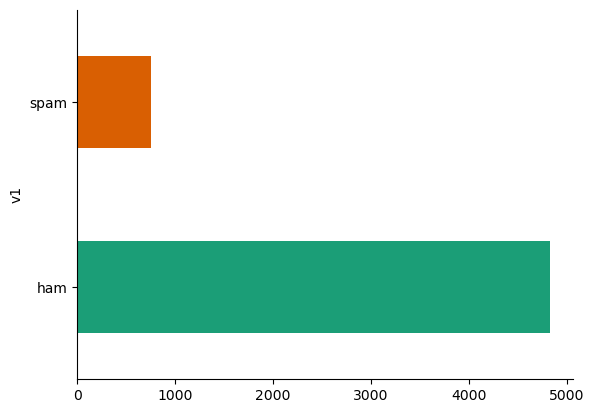

In [7]:
# Observing the repartition in the v1 column
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
print("Le nombre d'elements uniques dans v2 :", df.v2.nunique())
print("Le nombre d'elements uniques dans Unnamed: 2 :", df['Unnamed: 2'].nunique())
print("Le nombre d'elements uniques dans Unnamed: 3 :", df['Unnamed: 3'].nunique())
print("Le nombre d'elements uniques dans Unnamed: 4 :", df['Unnamed: 4'].nunique())

Le nombre d'elements uniques dans v2 : 5169
Le nombre d'elements uniques dans Unnamed: 2 : 43
Le nombre d'elements uniques dans Unnamed: 3 : 10
Le nombre d'elements uniques dans Unnamed: 4 : 5


Here, we obtain a dataframe of dimensions 5572 x 5, with 'v1' as the target to indicate whether the email is spam or ham. 'v2' is the content of the email, and the other columns are not explicitly defined and contain less information. To avoid losing information, we will concatenate the various columns, except for 'v1', into a new column named 'text'. It can also be observed that the distribution in the 'v1' column is unbalanced.

# 5.    Preprocessing

In [9]:
#We join every column into a new one called 'text'
df['text'] = df.astype(str).apply(lambda row: ' '.join(row), axis=1)

In [10]:
#Displaying the dataframe
display(df)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,text
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"ham Go until jurong point, crazy.. Available o..."
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ham Ok lar... Joking wif u oni... nan nan nan
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,spam Free entry in 2 a wkly comp to win FA Cup...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,ham U dun say so early hor... U c already then...
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"ham Nah I don't think he goes to usf, he lives..."
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,spam This is the 2nd time we have tried 2 cont...
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,ham Will Ì_ b going to esplanade fr home? nan ...
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,"ham Pity, * was in mood for that. So...any oth..."
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,ham The guy did some bitching but I acted like...


In [11]:
#Verifying Stop words
print(STOP_WORDS)

{'otherwise', 'back', 'some', 'last', 'third', 'been', 'via', 'down', 'mostly', 'next', 'hereupon', 'seem', "n't", 'everyone', 'they', 'nor', 'go', 'alone', 'thence', 'why', 'of', 'never', 'my', 'those', 'me', 'were', 'often', 'even', 'their', 'serious', 'on', 'hence', 'such', '’ve', 'you', 'though', 'indeed', 'nowhere', 'least', 'everywhere', 'very', 'hundred', '‘m', 'to', 'these', 'done', 'front', 'it', 'get', 'an', 'amount', 'used', 'there', 'ourselves', 'none', 'somewhere', 'beforehand', 'without', 'within', 'for', 'beside', 'thereby', 'below', 'our', 'really', 'throughout', 'her', 'until', 'except', 'up', 'any', 'off', 'than', 'ever', 'thus', "'m", 'many', 'please', 'became', 'always', 'because', 'before', 'about', 'see', 'yourself', 'first', 'six', 'beyond', 'from', 'can', 'out', 'further', 'with', 'few', 'therefore', 'else', 'must', 'onto', 'he', 'whither', 'him', 'make', 'hereafter', 'them', 'forty', 'becomes', 'every', 'whether', 'herself', 'between', 'was', 'yourselves', 'all

In [12]:
# Cleaning the text data
# Removing all non-alphanumeric characters except whitespaces from the text
df["text_clean"] = df["text"].apply(lambda x: ''.join(ch for ch in x if ch.isalnum() or ch == " "))

# Converting the 'v1' column values from 'ham' to '0' and 'spam' to '1'
df["v1"] = df["v1"].apply(lambda x: x.replace("ham", "0"))
df["v1"] = df["v1"].apply(lambda x: x.replace("spam", "1"))
df['v1'] = df['v1'].astype(float)  # Changing the data type of 'v1' to float

# Further cleaning the 'text_clean' column
# Removing extra spaces and spaces at the beginning and end of the strings
df["text_clean"] = df["text_clean"].apply(lambda x: x.replace(" +", " ").lower().strip())

# Removing occurrences of the words 'ham', 'spam', and 'nan' in 'text_clean'
df["text_clean"] = df["text_clean"].apply(lambda x: x.replace("ham", " "))
df["text_clean"] = df["text_clean"].apply(lambda x: x.replace("spam", " "))
df["text_clean"] = df["text_clean"].apply(lambda x: x.replace("nan", " "))

# Natural Language Processing: Removing stop words and lemmatizing
#Initialising Natural Language Processing
nlp = en_core_web_sm.load()
# Lemmatization converts words to their base or root form (lemma)
# Stop words (common words that typically don't contribute much meaning, like 'the', 'is', etc.) are removed
df["text_clean"] = df["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))


In [13]:
#Selecting important columns and renaming v1 into target
df = df.loc[:, ['v1', 'text_clean']]
df = df.rename(columns = {'v1':'target'})
df

,target,text_clean
0,0.0,jurong point crazy available bugis n great ...
1,0.0,ok lar joke wif u oni
2,1.0,free entry 2 wkly comp win fa cup final tkt...
3,0.0,u dun early hor u c
4,0.0,nah think usf live
...,...,...
5567,1.0,2nd time try 2 contact u u win å750 pound p...
5568,0.0,ì b esplanade fr home
5569,0.0,pity mood soany suggestion
5570,0.0,guy bitching act like d interested buy week...


## 5.1 Tokenizing

In [14]:
# instanciate the tokenizer
# num_words indicates the number of words to keep in the tokenization
# keeps only the most common words, here 1000 words
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000)

# fit the tokenizer on the texts
# in this step the tokenizer will list all unique tokens in the text
# and associate them with a specific integer.
tokenizer.fit_on_texts(df.text_clean)

# This step will effectively transform the texts into sequences of indices
df["text_encoded"] = tokenizer.texts_to_sequences(df.text_clean)

# Sometimes the preprocessing removes all the words in a string (because they contain
# only stopwords for example) so we calculate the length in order to filter out
# those records
df["len_text"] = df["text_encoded"].apply(lambda x: len(x))
df = df[df["len_text"]!=0]

In [15]:
tokenizer.word_counts

OrderedDict([('jurong', 1),
             ('point', 33),
             ('crazy', 17),
             ('available', 16),
             ('bugis', 7),
             ('n', 146),
             ('great', 113),
             ('world', 36),
             ('la', 7),
             ('e', 88),
             ('buffet', 2),
             ('cine', 7),
             ('amore', 1),
             ('wat', 109),
             ('ok', 278),
             ('lar', 38),
             ('joke', 16),
             ('wif', 27),
             ('u', 1134),
             ('oni', 4),
             ('free', 275),
             ('entry', 26),
             ('2', 482),
             ('wkly', 14),
             ('comp', 11),
             ('win', 151),
             ('fa', 4),
             ('cup', 8),
             ('final', 18),
             ('tkts', 4),
             ('21st', 3),
             ('2005', 3),
             ('text', 214),
             ('87121', 4),
             ('receive', 45),
             ('questionstd', 2),
             ('txt', 174),
 

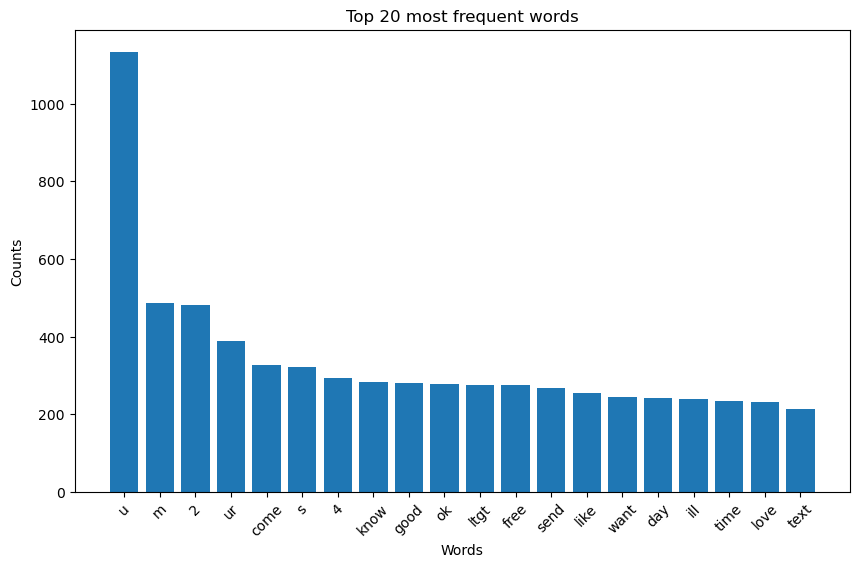

In [16]:
# Assuming 'tokenizer' is your Keras Tokenizer instance
word_counts = tokenizer.word_counts

# Sort the words by frequency
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Select the top N words to display
N = 20  # for example, top 20 words
top_words, top_counts = zip(*sorted_word_counts[:N])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.title(f'Top {N} most frequent words')
plt.show()


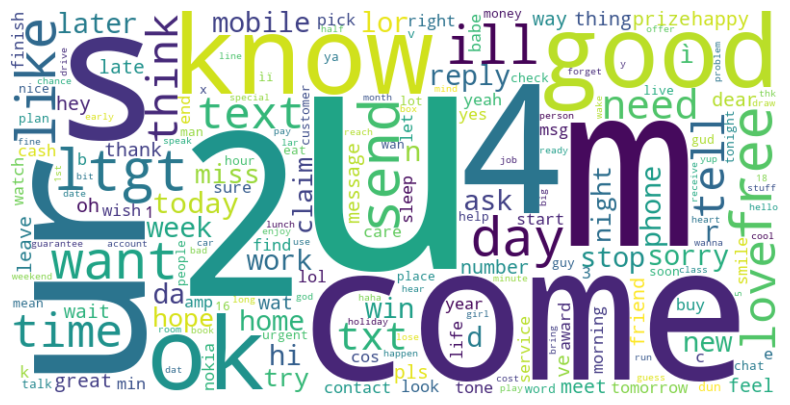

In [17]:
# Generate a word cloud to display the tendance
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 5.2 Padding

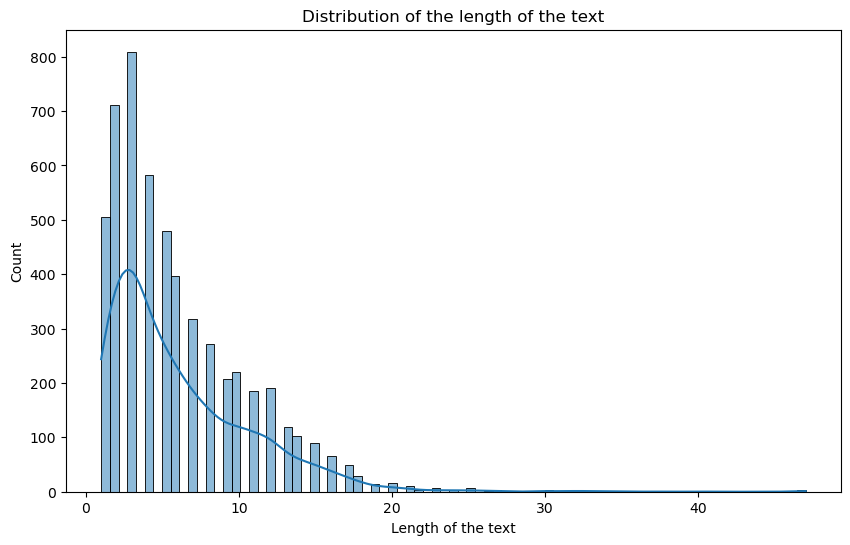

In [18]:
# Plotting the distribution of the length of the text
plt.figure(figsize=(10, 6))
sns.histplot(df.len_text, kde=True)
plt.title('Distribution of the length of the text')
plt.xlabel('Length of the text')
plt.ylabel('Count')
plt.show()

In [19]:
# Pad the sequences in 'text_encoded' column of the DataFrame 'df' so that they all have the same length.
# Padding is done at the end (post-padding) of each sequence with zeros (default padding value).
data_pad = tf.keras.preprocessing.sequence.pad_sequences(df.text_encoded, padding="post")
data_pad

array([[233, 447, 462, ...,   0,   0,   0],
       [ 10, 193, 463, ...,   0,   0,   0],
       [ 12, 299,   3, ...,   0,   0,   0],
       ...,
       [943,   0,   0, ...,   0,   0,   0],
       [113,  14,  27, ...,   0,   0,   0],
       [310,   0,   0, ...,   0,   0,   0]])

In [20]:
# Show length of the padded sequences
len(data_pad[0])

47

## 5.3 Train test split

In [21]:
# Setting the batch size for training
BATCH_SIZE = 64

# Train Test Split
# Splitting the dataset into training and validation sets
# 'test_size=0.3' means 30% of the data is reserved for the validation set
# 'stratify=df.target' ensures that the proportion of classes in both sets is similar
xtrain, xval, ytrain, yval = train_test_split(data_pad, df.target, test_size=0.3, stratify=df.target)
print('xtrain shape :', xtrain.shape, 'ytrain shape :', ytrain.shape)
print('xval shape :', xval.shape, 'yval shape :', yval.shape)

# Creating TensorFlow datasets for training and validation
# This wraps the data in a TensorFlow Dataset object
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))

# Preparing the dataset for training
# .shuffle(len(train)) randomizes the order of the training data
# .batch(BATCH_SIZE) groups the data into batches of the specified size
train_batch = train.shuffle(len(train)).batch(BATCH_SIZE)
val_batch = val.shuffle(len(val)).batch(BATCH_SIZE)

# Displaying a single batch of the training data
print('---------------------------------------------------')
for mail, cat in train_batch.take(1):
  print(mail, cat)


xtrain shape : (3789, 47) ytrain shape : (3789,)
xval shape : (1625, 47) yval shape : (1625,)
---------------------------------------------------
tf.Tensor(
[[ 59 159 116 ...   0   0   0]
 [ 55 179   3 ...   0   0   0]
 [ 79  50 238 ...   0   0   0]
 ...
 [  4 419   4 ...   0   0   0]
 [ 10   0   0 ...   0   0   0]
 [ 20   0   0 ...   0   0   0]], shape=(64, 47), dtype=int32) tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.], shape=(64,), dtype=float64)


# 6.    Simple model

We begin with a basic model that includes an embedding layer with 8 neurons, followed by a pooling layer to capture the average, which then directly feeds into a dense layer with a single neuron and a sigmoid activation for binary classification.

In [22]:
# Setting the vocabulary size based on the tokenizer's number of words
vocab_size = tokenizer.num_words

# Building the neural network model using Keras Sequential API
model_simple = tf.keras.Sequential([
    # Input Layer: Word Embedding
    # Converts the input sequence of word indexes into dense vectors of fixed size
    # 'vocab_size + 1' is used because the index '0' is reserved in Keras for padding
    # '8' is the dimensionality of the embedding output vectors
    tf.keras.layers.Embedding(vocab_size + 1, 8, input_shape=[mail.shape[1],], name="embedding"),

    # Global Average Pooling
    # Averages over the sequence dimension, reducing each sequence to a single vector
    tf.keras.layers.GlobalAveragePooling1D(),

    # Output Layer
    # Dense layer with a single neuron and sigmoid activation function
    # Sigmoid is used as it squashes the output between 0 and 1, suitable for binary classification
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_simple.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 47, 8)             8008      
                                                                 
 global_average_pooling1d (  (None, 8)                 0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8017 (31.32 KB)
Trainable params: 8017 (31.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 6.1 Class weight

Given the dataset's imbalance, we will calculate the appropriate weights to enhance the model's performance.

In [23]:
# Calculating class weights for handling class imbalance
# 'df.target.value_counts()' counts the number of occurrences of each unique value in the 'target' column

weights = 1/ df.target.value_counts()

# Multiplying by half of the total number of records in the dataframe
# This helps in normalizing the weights and making them proportionate to the dataset size
weights = weights * len(df) / 2

# Converting the weights into a dictionary format
# 'index' corresponds to the unique values in the 'target' column, and 'values' are the calculated weights
weights = {index: values for index, values in zip(weights.index, weights.values)}

# Displaying the calculated weights
weights


{0.0: 0.5797815378025273, 1.0: 3.6335570469798655}

## 6.2 Compiler

In [24]:
# Initializing the Adam optimizer for the model
# Adam is a popular optimizer that combines the advantages of two other extensions of stochastic gradient descent,
# namely Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp)
optimizer_simple = tf.keras.optimizers.Adam()
model_simple.compile(optimizer=optimizer_simple,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                  'Accuracy',
              ])

## 6.3 Training

In [25]:
# Training the model
history = model_simple.fit(
    train_batch,  # Training data: the model will be trained on this data
    epochs=50,  # Number of epochs: the number of times the model will go through the entire training dataset
    validation_data=val_batch,  # Validation data: used to evaluate the model at the end of each epoch
    class_weight=weights  # Class weights: used to give different importance to classes
)

Epoch 1/50




60/60 [==============================] - 1s 6ms/step - loss: 0.6903 - Accuracy: 0.6112 - val_loss: 0.6792 - val_Accuracy: 0.9114
Epoch 2/50
60/60 [==============================] - 0s 1ms/step - loss: 0.6819 - Accuracy: 0.8728 - val_loss: 0.6508 - val_Accuracy: 0.8806
Epoch 3/50
60/60 [==============================] - 0s 1ms/step - loss: 0.6715 - Accuracy: 0.8865 - val_loss: 0.6360 - val_Accuracy: 0.9108
Epoch 4/50
60/60 [==============================] - 0s 1ms/step - loss: 0.6582 - Accuracy: 0.9116 - val_loss: 0.6109 - val_Accuracy: 0.9169
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 0.6419 - Accuracy: 0.9417 - val_loss: 0.5934 - val_Accuracy: 0.9348
Epoch 6/50
60/60 [==============================] - 0s 1ms/step - loss: 0.6228 - Accuracy: 0.9417 - val_loss: 0.5712 - val_Accuracy: 0.9440
Epoch 7/50
60/60 [==============================] - 0s 1ms/step - loss: 0.6013 - Accuracy: 0.9591 - val_loss: 0.5523 - val_Accuracy: 0.9575
Epoch 8/50
60/60 [============

## 6.4 Accuracy results

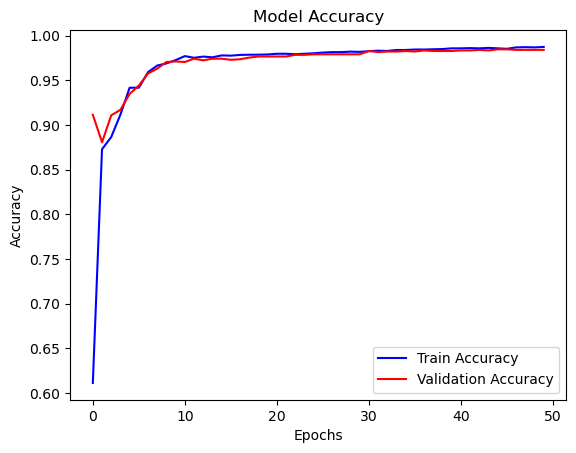

In [26]:
# Plotting training and validation accuracy
plt.plot(history.history['Accuracy'], color='blue', label='Train Accuracy')
plt.plot(history.history['val_Accuracy'], color='red', label='Validation Accuracy')

# Adding title and labels
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [27]:
#Calculate baseline accuracy by determining the percentage of instances of the most frequent class in 'v1' column of the DataFrame 'df'.
#This represents the accuracy if the most common class was predicted every time, here the email being a 'ham'.
print('Baseline accuracy is : {:.2f}%'.format(df['target'].value_counts()[0] * 100 / df['target'].count()))

Baseline accuracy is : 86.24%


If we only consider accuracy, the results might appear impressively high. However, due to a significant class imbalance favoring ham over spam, we require additional metrics to differentiate between a genuinely high-performing model capable of accurate generalization and one with misleadingly inflated accuracy. Additionally, there is a notable presence of overfitting in the model.

## 6.5 Additional metrics

Due to an issue with the F1Score function in tf.keras.metrics, I am utilizing a custom function to calculate the F1Score, as defined below.

In [28]:
# Defining a custom F1 Score metric class
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        # Initializing metrics to keep track of True Positives, False Positives, and False Negatives
        self.true_positives = tf.keras.metrics.TruePositives()
        self.false_positives = tf.keras.metrics.FalsePositives()
        self.false_negatives = tf.keras.metrics.FalseNegatives()

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Rounding predictions to get binary values (0 or 1)
        y_pred = tf.round(y_pred)
        # Updating the state of true positives, false positives, and false negatives
        self.true_positives.update_state(y_true, y_pred, sample_weight)
        self.false_positives.update_state(y_true, y_pred, sample_weight)
        self.false_negatives.update_state(y_true, y_pred, sample_weight)

    def result(self):
        # Calculating precision and recall
        precision = self.true_positives.result() / (self.true_positives.result() + self.false_positives.result())
        recall = self.true_positives.result() / (self.true_positives.result() + self.false_negatives.result())
        # Returning the F1 Score, which is the harmonic mean of precision and recall
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        # Resetting the states of true positives, false positives, and false negatives for the next batch
        self.true_positives.reset_states()
        self.false_positives.reset_states()
        self.false_negatives.reset_states()

# Defining a custom F1 Score metric class
class Accuracy(tf.keras.metrics.Metric):
    def __init__(self, name='accuracy', **kwargs):
        super(Accuracy, self).__init__(name=name, **kwargs)
        # Initializing metrics to keep track of True Positives, False Positives, and False Negatives
        self.true_positives = tf.keras.metrics.TruePositives()
        self.true_negatives = tf.keras.metrics.TrueNegatives()
        self.false_positives = tf.keras.metrics.FalsePositives()
        self.false_negatives = tf.keras.metrics.FalseNegatives()

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Rounding predictions to get binary values (0 or 1)
        y_pred = tf.round(y_pred)
        # Updating the state of true positives, false positives, and false negatives
        self.true_positives.update_state(y_true, y_pred, sample_weight)
        self.true_negatives.update_state(y_true, y_pred, sample_weight)
        self.false_positives.update_state(y_true, y_pred, sample_weight)
        self.false_negatives.update_state(y_true, y_pred, sample_weight)

    def result(self):
        # Calculating precision and recall
        top = self.true_positives.result() + self.true_negatives.result()
        bot = self.true_positives.result() + self.true_negatives.result() + self.false_positives.result() + self.false_negatives.result()
        # Returning the F1 Score, which is the harmonic mean of precision and recall
        return top / bot

    def reset_states(self):
        # Resetting the states of true positives, false positives, and false negatives for the next batch
        self.true_positives.reset_states()
        self.true_negatives.reset_states()
        self.false_positives.reset_states()
        self.false_negatives.reset_states()

# Compiling the model
# The model uses binary cross-entropy as the loss function, suitable for binary classification tasks
# Metrics include True Positives, True Negatives, False Negatives, False Positives, Recall, Precision, and the custom F1 Score
optimizer = tf.keras.optimizers.Adam()
model_simple.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                  tf.keras.metrics.TruePositives(name="tp"),
                  tf.keras.metrics.TrueNegatives(name="tn"),
                  tf.keras.metrics.FalseNegatives(name="fn"),
                  tf.keras.metrics.FalsePositives(name="fp"),
                  tf.keras.metrics.Recall(name="recall"),
                  tf.keras.metrics.Precision(name="precision"),
                  F1Score(),
                  Accuracy()
              ])



In [29]:
# Training the model
history = model_simple.fit(
    train_batch,  # Training data: the model will be trained on this data
    epochs=50,  # Number of epochs: the number of times the model will go through the entire training dataset
    validation_data=val_batch,  # Validation data: used to evaluate the model at the end of each epoch
    class_weight=weights  # Class weights: used to give different importance to classes
)


Epoch 1/50


60/60 [==============================] - 2s 14ms/step - loss: 0.1173 - tp: 490.0000 - tn: 3249.0000 - fn: 31.0000 - fp: 19.0000 - recall: 0.9405 - precision: 0.9627 - f1_score: 0.9515 - accuracy: 0.9868 - val_loss: 0.1116 - val_tp: 206.0000 - val_tn: 1394.0000 - val_fn: 18.0000 - val_fp: 7.0000 - val_recall: 0.9196 - val_precision: 0.9671 - val_f1_score: 0.9428 - val_accuracy: 0.9846
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1134 - tp: 486.0000 - tn: 3255.0000 - fn: 35.0000 - fp: 13.0000 - recall: 0.9328 - precision: 0.9739 - f1_score: 0.9529 - accuracy: 0.9873 - val_loss: 0.1114 - val_tp: 206.0000 - val_tn: 1393.0000 - val_fn: 18.0000 - val_fp: 8.0000 - val_recall: 0.9196 - val_precision: 0.9626 - val_f1_score: 0.9406 - val_accuracy: 0.9840
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1102 - tp: 495.0000 - tn: 3245.0000 - fn: 26.0000 - fp: 23.0000 - recall: 0.9501 - precision: 0.9556 - f1_score: 0.9528 - accuracy: 0.9871 - v

## 6.6 Model's performance

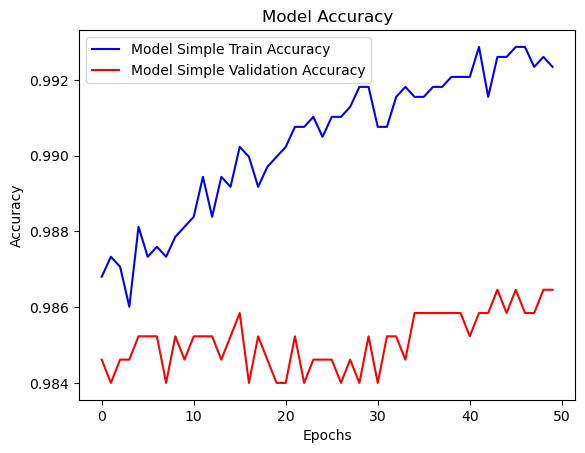

In [30]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], color='blue', label='Model Simple Train Accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='Model Simple Validation Accuracy')

# Adding title and labels
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Adding legend
plt.legend()

# Display the plot
plt.show()

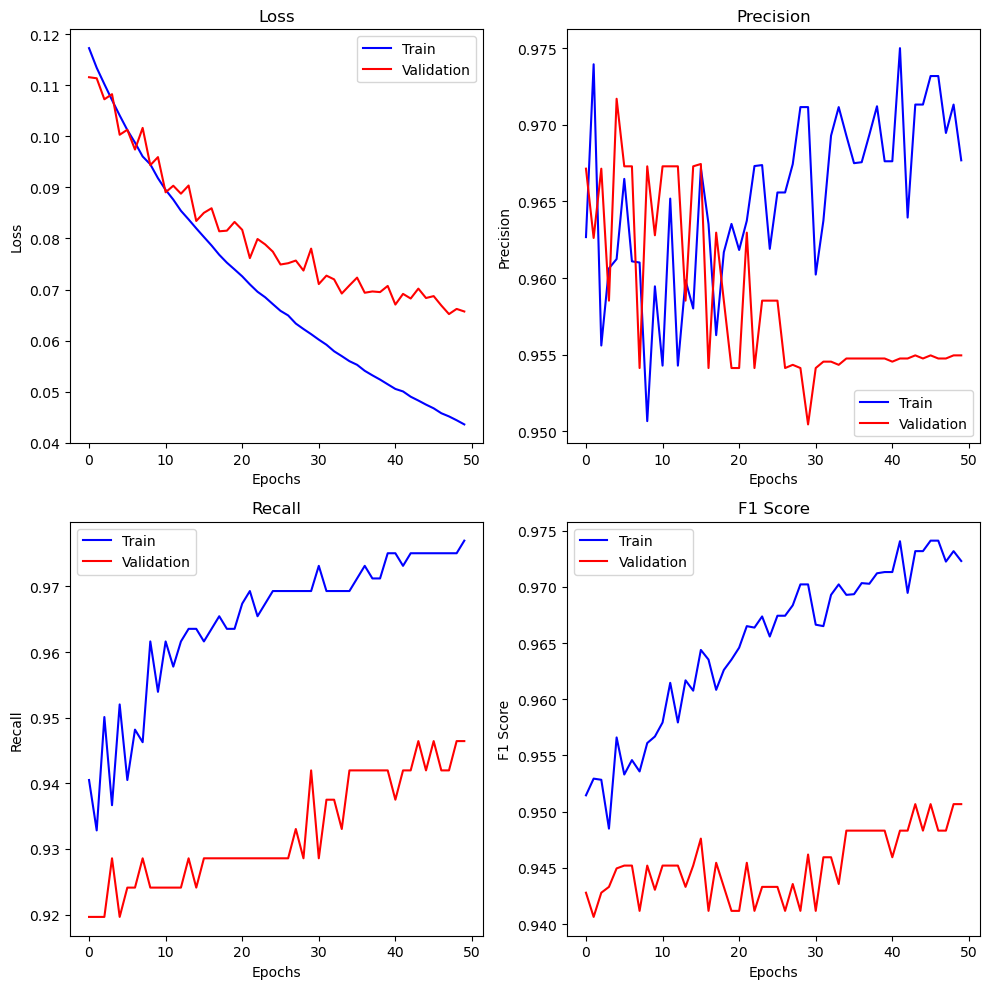

In [31]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot 'loss'
axs[0, 0].plot(history.history['loss'], color='blue', label='Train')
axs[0, 0].plot(history.history['val_loss'], color='red', label='Validation')
axs[0, 0].set_title('Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plot 'precision'
axs[0, 1].plot(history.history['precision'], color='blue', label='Train')
axs[0, 1].plot(history.history['val_precision'], color='red', label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].legend()

# Plot 'recall'
axs[1, 0].plot(history.history['recall'], color='blue', label='Train')
axs[1, 0].plot(history.history['val_recall'], color='red', label='Validation')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

# Plot 'f1_score'
axs[1, 1].plot(history.history['f1_score'], color='blue', label='Train')
axs[1, 1].plot(history.history['val_f1_score'], color='red', label='Validation')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()



The outcomes indicate a significant case of overfitting, as evidenced by a high F1Score of approximately 0.98 for the training set compared to a lower score of 0.935 for the validation set.

 1/26 [>.............................] - ETA: 1s

26/26 [==============================] - 0s 712us/step


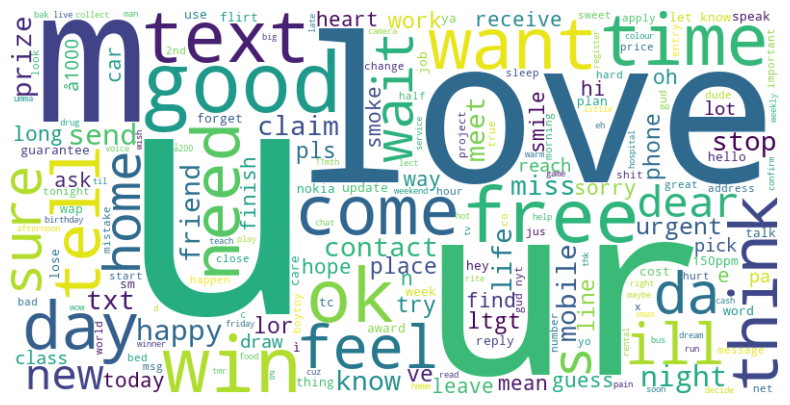

In [32]:
# Predictions from the model
predictions = model_simple.predict(val_batch)

# Finding the indice where the model predicted 'spam'
spam_indices = [i for i, prediction in enumerate(predictions) if prediction > 0.5]

# Extract spam messages
enc_spam_messages = [data_pad[i] for i in spam_indices]
spam_messages = tokenizer.sequences_to_texts(enc_spam_messages)

# Combine all spam messages into a single string
spam_text = " ".join(spam_messages)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The metrics serve to assess the model's performance. Initially, we see the loss function decreasing towards zero in the training set, indicative of a well-functioning model. However, an increasing loss in the validation set suggests difficulties in generalizing from the training data. This discrepancy is also evident in other metrics, where the model performs exceptionally well on the training set but falls short on the validation set, indicating overfitting. Next, we will explore alternative approaches to achieve improved prediction accuracy.

# 7. Model with an hidden layer

Having experimented with a very basic model, we can now progress to a slightly more sophisticated version. In this upgraded model, we'll incorporate an additional dense layer equipped with 32 neurons and a 'relu' activation function.

In [33]:
# Setting the vocabulary size based on the tokenizer's number of words
vocab_size = tokenizer.num_words

# Building the neural network model using Keras Sequential API
model_complex = tf.keras.Sequential([
    # Input Layer: Word Embedding
    # Converts the input sequence of word indexes into dense vectors of fixed size
    # 'vocab_size + 1' is used because the index '0' is reserved in Keras for padding
    # '8' is the dimensionality of the embedding output vectors
    tf.keras.layers.Embedding(vocab_size + 1, 8, input_shape=[mail.shape[1],], name="embedding"),

    # Global Average Pooling
    # Averages over the sequence dimension, reducing each sequence to a single vector
    tf.keras.layers.GlobalAveragePooling1D(),

    # Hidden Layers: Dense Layers
    # Three dense layers with 8 neurons each and ReLU activation function
    # ReLU (Rectified Linear Unit) is commonly used and helps with non-linearities in the data
    tf.keras.layers.Dense(32, activation='relu'),

    # Output Layer
    # Dense layer with a single neuron and sigmoid activation function
    # Sigmoid is used as it squashes the output between 0 and 1, suitable for binary classification
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [34]:
model_complex.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 47, 8)             8008      
                                                                 
 global_average_pooling1d_1  (None, 8)                 0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8329 (32.54 KB)
Trainable params: 8329 (32.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 7.1 Compiler

In [35]:
# Compiling the model
# The model uses binary cross-entropy as the loss function, suitable for binary classification tasks
# Metrics include True Positives, True Negatives, False Negatives, False Positives, Recall, Precision, and the custom F1 Score
optimizer_complex = tf.keras.optimizers.Adam()
model_complex.compile(optimizer=optimizer_complex,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                  tf.keras.metrics.TruePositives(name="tp"),
                  tf.keras.metrics.TrueNegatives(name="tn"),
                  tf.keras.metrics.FalseNegatives(name="fn"),
                  tf.keras.metrics.FalsePositives(name="fp"),
                  tf.keras.metrics.Recall(name="recall"),
                  tf.keras.metrics.Precision(name="precision"),
                  F1Score(),
                  Accuracy(),
              ])

## 7.2 Training

In [36]:
# Training the model
history_complex = model_complex.fit(
    train_batch,  # Training data: the model will be trained on this data
    epochs=50,  # Number of epochs: the number of times the model will go through the entire training dataset
    validation_data=val_batch,  # Validation data: used to evaluate the model at the end of each epoch
    class_weight=weights  # Class weights: used to give different importance to classes
)

Epoch 1/50


60/60 [==============================] - 2s 14ms/step - loss: 0.6899 - tp: 82.0000 - tn: 2977.0000 - fn: 439.0000 - fp: 291.0000 - recall: 0.1574 - precision: 0.2198 - f1_score: 0.1834 - accuracy: 0.8073 - val_loss: 0.6702 - val_tp: 34.0000 - val_tn: 1401.0000 - val_fn: 190.0000 - val_fp: 0.0000e+00 - val_recall: 0.1518 - val_precision: 1.0000 - val_f1_score: 0.2636 - val_accuracy: 0.8831
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6715 - tp: 177.0000 - tn: 3266.0000 - fn: 344.0000 - fp: 2.0000 - recall: 0.3397 - precision: 0.9888 - f1_score: 0.5057 - accuracy: 0.9087 - val_loss: 0.6117 - val_tp: 93.0000 - val_tn: 1401.0000 - val_fn: 131.0000 - val_fp: 0.0000e+00 - val_recall: 0.4152 - val_precision: 1.0000 - val_f1_score: 0.5868 - val_accuracy: 0.9194
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6188 - tp: 318.0000 - tn: 3263.0000 - fn: 203.0000 - fp: 5.0000 - recall: 0.6104 - precision: 0.9845 - f1_score: 0.7536 - accuracy: 0

## 7.3 Model's performance

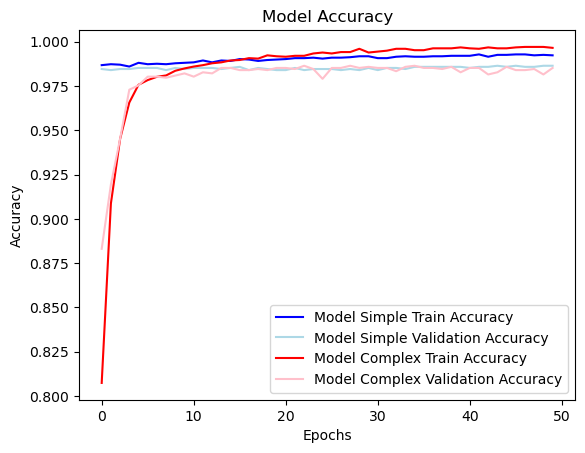

In [37]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], color='blue', label='Model Simple Train Accuracy')
plt.plot(history.history['val_accuracy'], color='lightblue', label='Model Simple Validation Accuracy')
plt.plot(history_complex.history['accuracy'], color='red', label='Model Complex Train Accuracy')
plt.plot(history_complex.history['val_accuracy'], color='pink', label='Model Complex Validation Accuracy')


# Adding title and labels
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Adding legend
plt.legend()

# Display the plot
plt.show()

The validation set accuracies of the models are comparable, though the model with a hidden layer exhibits marginally superior performance before it begins to overfit, while the simpler model shows a more pronounced tendency towards overfitting.

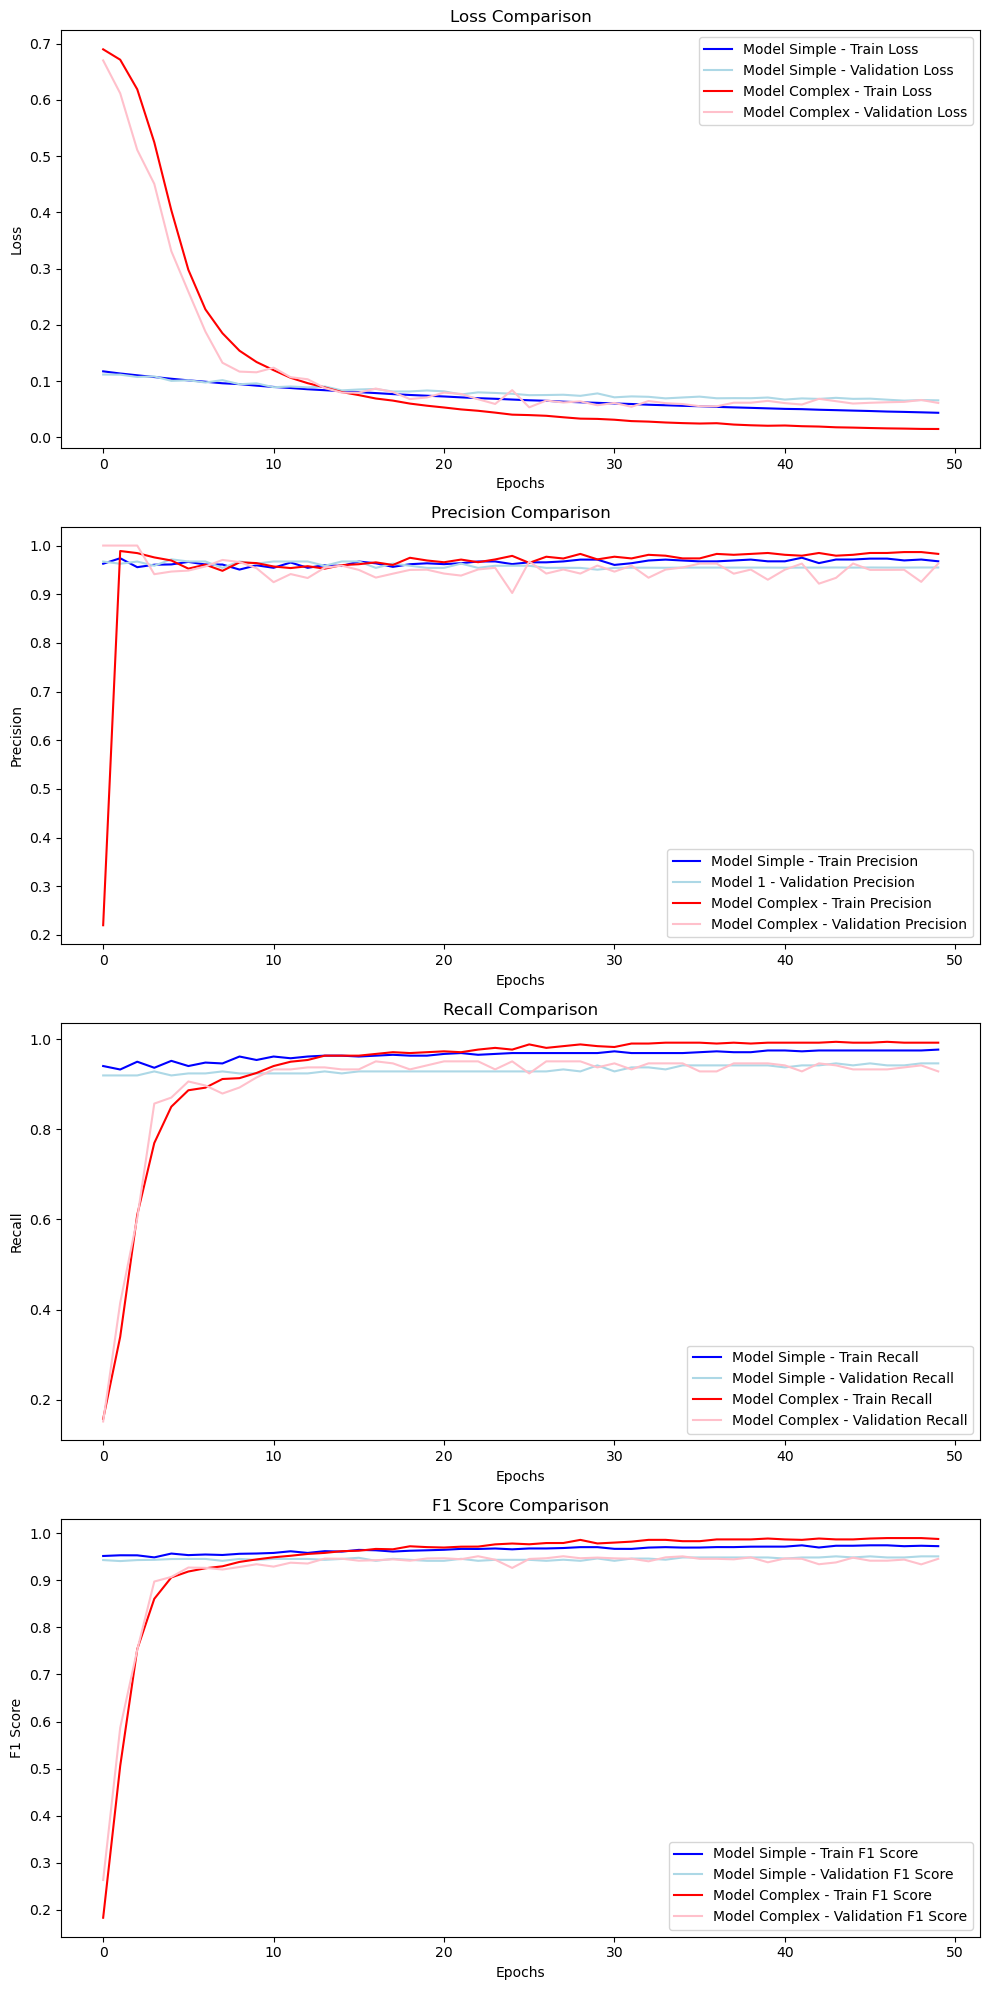

In [38]:
# Create a 4x1 grid of subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Plot 'loss' for both models on the same subplot
axs[0].plot(history.history['loss'], color='blue', label='Model Simple - Train Loss')
axs[0].plot(history.history['val_loss'], color='lightblue', label='Model Simple - Validation Loss')
axs[0].plot(history_complex.history['loss'], color='red', label='Model Complex - Train Loss')
axs[0].plot(history_complex.history['val_loss'], color='pink', label='Model Complex - Validation Loss')
axs[0].set_title('Loss Comparison')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot 'precision' for both models
axs[1].plot(history.history['precision'], color='blue', label='Model Simple - Train Precision')
axs[1].plot(history.history['val_precision'], color='lightblue', label='Model 1 - Validation Precision')
axs[1].plot(history_complex.history['precision'], color='red', label='Model Complex - Train Precision')
axs[1].plot(history_complex.history['val_precision'], color='pink', label='Model Complex - Validation Precision')
axs[1].set_title('Precision Comparison')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Precision')
axs[1].legend()

# Repeat for 'recall'
axs[2].plot(history.history['recall'], color='blue', label='Model Simple - Train Recall')
axs[2].plot(history.history['val_recall'], color='lightblue', label='Model Simple - Validation Recall')
axs[2].plot(history_complex.history['recall'], color='red', label='Model Complex - Train Recall')
axs[2].plot(history_complex.history['val_recall'], color='pink', label='Model Complex - Validation Recall')
axs[2].set_title('Recall Comparison')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Recall')
axs[2].legend()

# Repeat for 'f1_score'
axs[3].plot(history.history['f1_score'], color='blue', label='Model Simple - Train F1 Score')
axs[3].plot(history.history['val_f1_score'], color='lightblue', label='Model Simple - Validation F1 Score')
axs[3].plot(history_complex.history['f1_score'], color='red', label='Model Complex - Train F1 Score')
axs[3].plot(history_complex.history['val_f1_score'], color='pink', label='Model Complex - Validation F1 Score')
axs[3].set_title('F1 Score Comparison')
axs[3].set_xlabel('Epochs')
axs[3].set_ylabel('F1 Score')
axs[3].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()



The model we recently experimented with, featuring an added hidden layer, did not demonstrate notable enhancements over the basic model. To address this, we could consider introducing regularization to the hidden layer as a means to curb overfitting.

# 8.    Regularised Model

To enhance the model's performance, we can experiment by integrating both L1 and L2 regularization into the model and observe the resulting impact.

### 8.1 Regularisation L1

In [39]:
# Setting the vocabulary size based on the tokenizer's number of words
vocab_size = tokenizer.num_words

# Building the neural network model using Keras Sequential API
model_complex_l1 = tf.keras.Sequential([
    # Input Layer: Word Embedding
    # Converts the input sequence of word indexes into dense vectors of fixed size
    # 'vocab_size + 1' is used because the index '0' is reserved in Keras for padding
    # '8' is the dimensionality of the embedding output vectors
    tf.keras.layers.Embedding(vocab_size + 1, 8, input_shape=[mail.shape[1],], name="embedding"),

    # Global Average Pooling
    # Averages over the sequence dimension, reducing each sequence to a single vector
    tf.keras.layers.GlobalAveragePooling1D(),

    # Hidden Layers: Dense Layers
    # Three dense layers with 8 neurons each and ReLU activation function
    # ReLU (Rectified Linear Unit) is commonly used and helps with non-linearities in the data
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l1(0.01)),

    # Output Layer
    # Dense layer with a single neuron and sigmoid activation function
    # Sigmoid is used as it squashes the output between 0 and 1, suitable for binary classification
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [40]:
# Compiling the model
# The model uses binary cross-entropy as the loss function, suitable for binary classification tasks
# Metrics include True Positives, True Negatives, False Negatives, False Positives, Recall, Precision, and the custom F1 Score
optimizer_complex_l1 = tf.keras.optimizers.Adam()
model_complex_l1.compile(optimizer=optimizer_complex_l1,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                  tf.keras.metrics.TruePositives(name="tp"),
                  tf.keras.metrics.TrueNegatives(name="tn"),
                  tf.keras.metrics.FalseNegatives(name="fn"),
                  tf.keras.metrics.FalsePositives(name="fp"),
                  tf.keras.metrics.Recall(name="recall"),
                  tf.keras.metrics.Precision(name="precision"),
                  F1Score(),
                  Accuracy()
              ])

In [41]:
# Training the model
history_complex_l1 = model_complex_l1.fit(
    train_batch,  # Training data: the model will be trained on this data
    epochs=50,  # Number of epochs: the number of times the model will go through the entire training dataset
    validation_data=val_batch,  # Validation data: used to evaluate the model at the end of each epoch
    class_weight=weights  # Class weights: used to give different importance to classes
)

Epoch 1/50


60/60 [==============================] - 2s 11ms/step - loss: 1.1259 - tp: 72.0000 - tn: 3250.0000 - fn: 449.0000 - fp: 18.0000 - recall: 0.1382 - precision: 0.8000 - f1_score: 0.2357 - accuracy: 0.8767 - val_loss: 1.0350 - val_tp: 8.0000 - val_tn: 1401.0000 - val_fn: 216.0000 - val_fp: 0.0000e+00 - val_recall: 0.0357 - val_precision: 1.0000 - val_f1_score: 0.0690 - val_accuracy: 0.8671
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.9871 - tp: 162.0000 - tn: 3263.0000 - fn: 359.0000 - fp: 5.0000 - recall: 0.3109 - precision: 0.9701 - f1_score: 0.4709 - accuracy: 0.9039 - val_loss: 0.9179 - val_tp: 101.0000 - val_tn: 1401.0000 - val_fn: 123.0000 - val_fp: 0.0000e+00 - val_recall: 0.4509 - val_precision: 1.0000 - val_f1_score: 0.6215 - val_accuracy: 0.9243
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.8770 - tp: 152.0000 - tn: 3266.0000 - fn: 369.0000 - fp: 2.0000 - recall: 0.2917 - precision: 0.9870 - f1_score: 0.4504 - accuracy: 0.

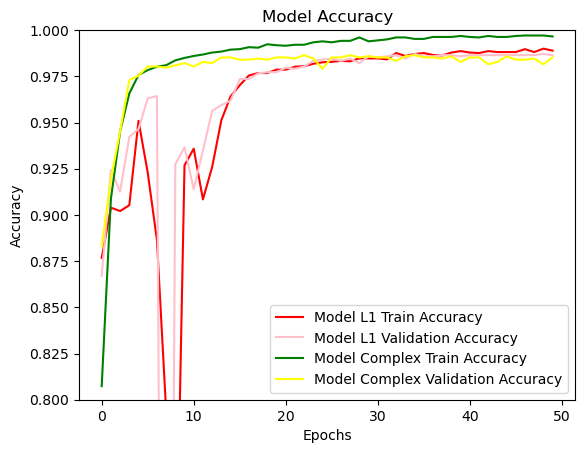

In [42]:
# Plotting training and validation accuracy
plt.plot(history_complex_l1.history['accuracy'], color='red', label='Model L1 Train Accuracy')
plt.plot(history_complex_l1.history['val_accuracy'], color='pink', label='Model L1 Validation Accuracy')
plt.plot(history_complex.history['accuracy'], color='green', label='Model Complex Train Accuracy')
plt.plot(history_complex.history['val_accuracy'], color='yellow', label='Model Complex Validation Accuracy')

# Adding title and labels
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Setting the y-axis limits to only show between 0.8 and 1
plt.ylim(0.8, 1)

# Adding legend
plt.legend()

# Display the plot
plt.show()


### 8.2 Regularisation L2

In [43]:
# Setting the vocabulary size based on the tokenizer's number of words
vocab_size = tokenizer.num_words

# Building the neural network model using Keras Sequential API
model_complex_l2 = tf.keras.Sequential([
    # Input Layer: Word Embedding
    # Converts the input sequence of word indexes into dense vectors of fixed size
    # 'vocab_size + 1' is used because the index '0' is reserved in Keras for padding
    # '8' is the dimensionality of the embedding output vectors
    tf.keras.layers.Embedding(vocab_size + 1, 8, input_shape=[mail.shape[1],], name="embedding"),

    # Global Average Pooling
    # Averages over the sequence dimension, reducing each sequence to a single vector
    tf.keras.layers.GlobalAveragePooling1D(),

    # Hidden Layers: Dense Layers
    # Three dense layers with 8 neurons each and ReLU activation function
    # ReLU (Rectified Linear Unit) is commonly used and helps with non-linearities in the data
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.1)),

    # Output Layer
    # Dense layer with a single neuron and sigmoid activation function
    # Sigmoid is used as it squashes the output between 0 and 1, suitable for binary classification
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [44]:
# Compiling the model
# The model uses binary cross-entropy as the loss function, suitable for binary classification tasks
# Metrics include True Positives, True Negatives, False Negatives, False Positives, Recall, Precision, and the custom F1 Score
optimizer_complex_l2 = tf.keras.optimizers.Adam()
model_complex_l2.compile(optimizer=optimizer_complex_l2,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                  tf.keras.metrics.TruePositives(name="tp"),
                  tf.keras.metrics.TrueNegatives(name="tn"),
                  tf.keras.metrics.FalseNegatives(name="fn"),
                  tf.keras.metrics.FalsePositives(name="fp"),
                  tf.keras.metrics.Recall(name="recall"),
                  tf.keras.metrics.Precision(name="precision"),
                  F1Score(),
                  Accuracy()
              ])

In [45]:
# Training the model
history_complex_l2 = model_complex_l2.fit(
    train_batch,  # Training data: the model will be trained on this data
    epochs=50,  # Number of epochs: the number of times the model will go through the entire training dataset
    validation_data=val_batch,  # Validation data: used to evaluate the model at the end of each epoch
    class_weight=weights  # Class weights: used to give different importance to classes
)

Epoch 1/50


60/60 [==============================] - 2s 16ms/step - loss: 1.5992 - tp: 17.0000 - tn: 3255.0000 - fn: 504.0000 - fp: 13.0000 - recall: 0.0326 - precision: 0.5667 - f1_score: 0.0617 - accuracy: 0.8636 - val_loss: 1.3762 - val_tp: 24.0000 - val_tn: 1401.0000 - val_fn: 200.0000 - val_fp: 0.0000e+00 - val_recall: 0.1071 - val_precision: 1.0000 - val_f1_score: 0.1935 - val_accuracy: 0.8769
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 1.2328 - tp: 10.0000 - tn: 3268.0000 - fn: 511.0000 - fp: 0.0000e+00 - recall: 0.0192 - precision: 1.0000 - f1_score: 0.0377 - accuracy: 0.8651 - val_loss: 1.0848 - val_tp: 21.0000 - val_tn: 1401.0000 - val_fn: 203.0000 - val_fp: 0.0000e+00 - val_recall: 0.0938 - val_precision: 1.0000 - val_f1_score: 0.1714 - val_accuracy: 0.8751
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 1.0050 - tp: 87.0000 - tn: 3268.0000 - fn: 434.0000 - fp: 0.0000e+00 - recall: 0.1670 - precision: 1.0000 - f1_score: 0.2862 - accura

## 8.3 Models' performances

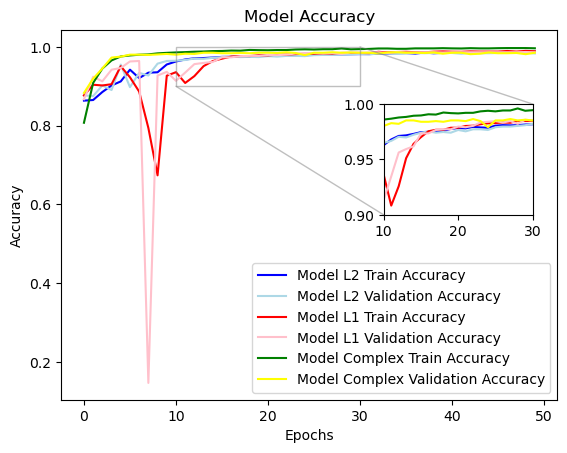

In [46]:
# Plotting training and validation accuracy
fig, ax = plt.subplots() # Create a figure and a set of subplots
ax.plot(history_complex_l2.history['accuracy'], color='blue', label='Model L2 Train Accuracy')
ax.plot(history_complex_l2.history['val_accuracy'], color='lightblue', label='Model L2 Validation Accuracy')
ax.plot(history_complex_l1.history['accuracy'], color='red', label='Model L1 Train Accuracy')
ax.plot(history_complex_l1.history['val_accuracy'], color='pink', label='Model L1 Validation Accuracy')
ax.plot(history_complex.history['accuracy'], color='green', label='Model Complex Train Accuracy')
ax.plot(history_complex.history['val_accuracy'], color='yellow', label='Model Complex Validation Accuracy')

# Adding title and labels to main plot
ax.set_title('Model Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

# Adding legend to main plot
ax.legend()

# Creating a zoomed-in plot
axins = ax.inset_axes([0.65, 0.5, 0.3, 0.3]) # Create an inset of the main plot


axins.plot(history_complex_l2.history['accuracy'], color='blue', label='Model L2 Train Accuracy')
axins.plot(history_complex_l2.history['val_accuracy'], color='lightblue', label='Model L2 Validation Accuracy')
axins.plot(history_complex_l1.history['accuracy'], color='red', label='Model L1 Train Accuracy')
axins.plot(history_complex_l1.history['val_accuracy'], color='pink', label='Model L1 Validation Accuracy')
axins.plot(history_complex.history['accuracy'], color='green', label='Model Complex Train Accuracy')
axins.plot(history_complex.history['val_accuracy'], color='yellow', label='Model Complex Validation Accuracy')

# Setting the x-axis and y-axis limits for the zoomed-in plot
axins.set_xlim(10, 30)
axins.set_ylim(0.9, 1)

# Adding the zoomed-in plot to the main plot
ax.indicate_inset_zoom(axins)

# Display the plot
plt.show()

Here, we see the varying performances of the models: the model labeled as 'complex' is exhibiting overfitting tendencies, while the models employing L1 and L2 regularization are producing favorable outcomes.

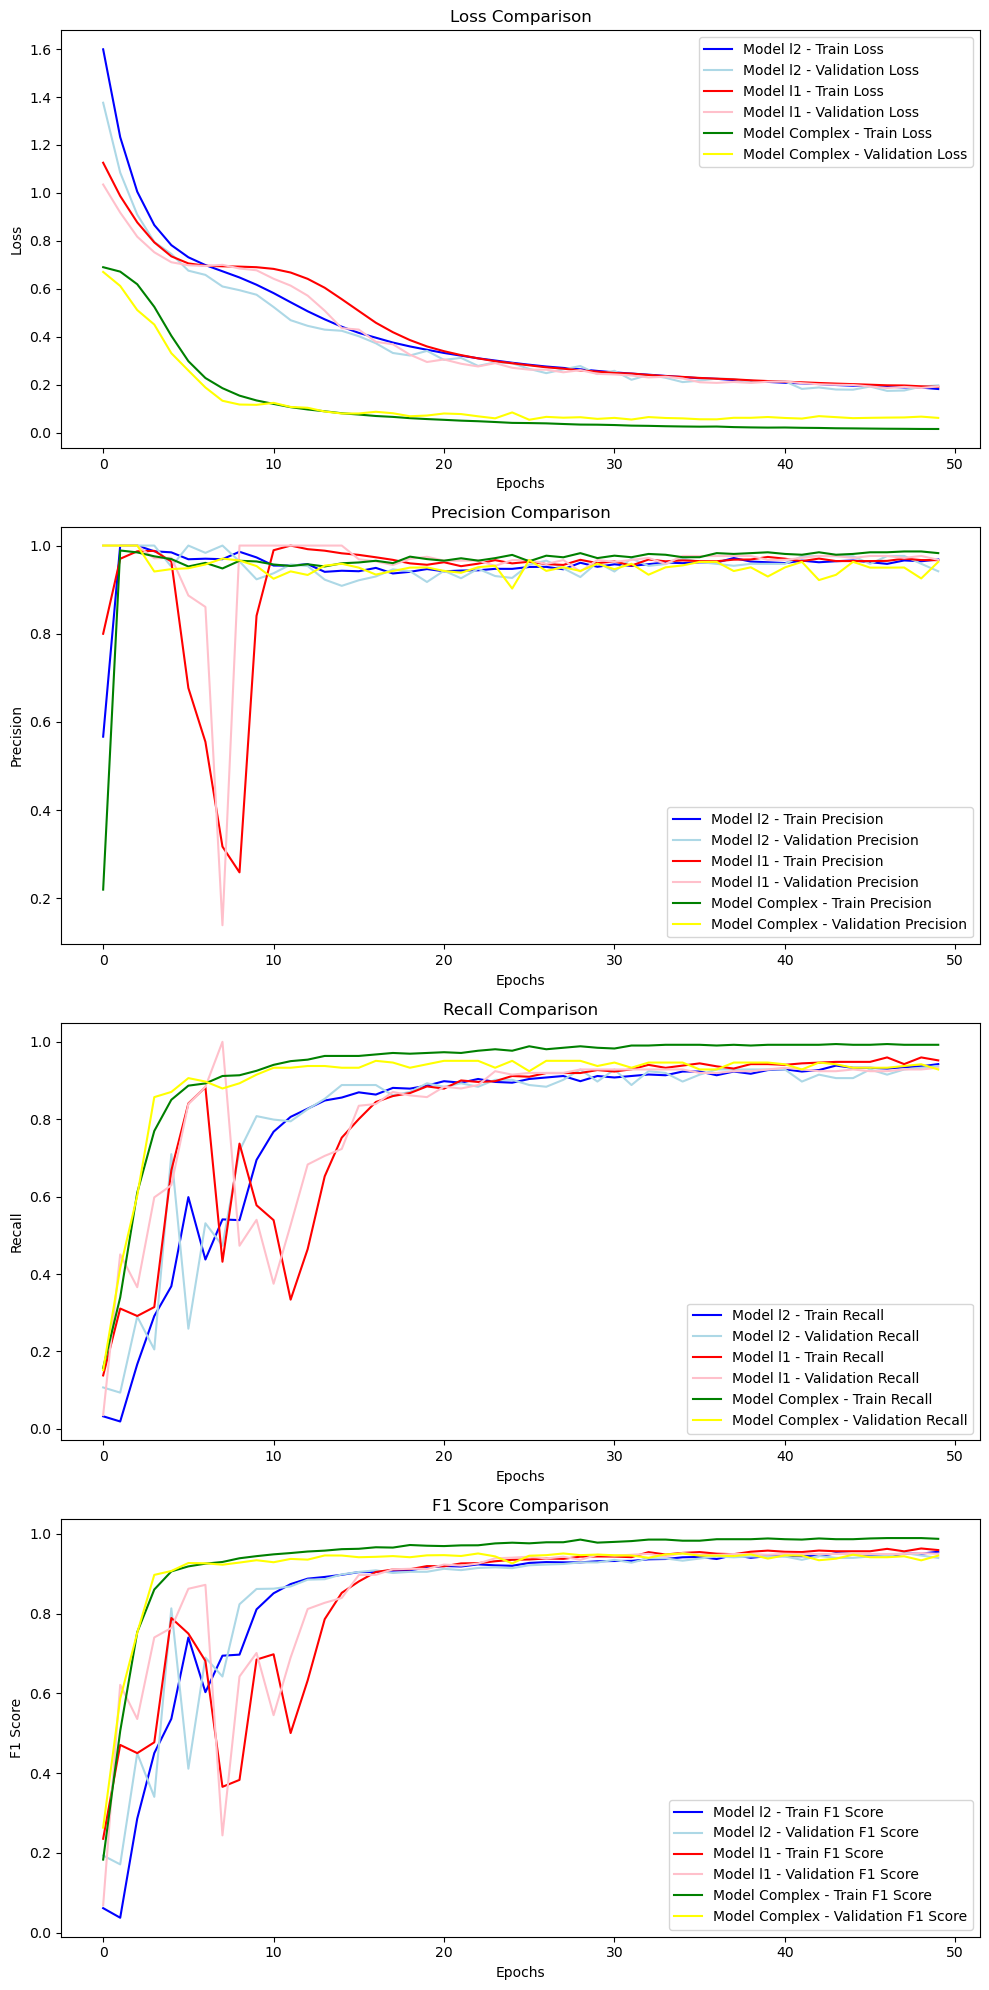

In [47]:
# Create a 4x1 grid of subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Plot 'loss' for both models on the same subplot
axs[0].plot(history_complex_l2.history['loss'], color='blue', label='Model l2 - Train Loss')
axs[0].plot(history_complex_l2.history['val_loss'], color='lightblue', label='Model l2 - Validation Loss')
axs[0].plot(history_complex_l1.history['loss'], color='red', label='Model l1 - Train Loss')
axs[0].plot(history_complex_l1.history['val_loss'], color='pink', label='Model l1 - Validation Loss')
axs[0].plot(history_complex.history['loss'], color='green', label='Model Complex - Train Loss')
axs[0].plot(history_complex.history['val_loss'], color='yellow', label='Model Complex - Validation Loss')
axs[0].set_title('Loss Comparison')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot 'precision' for both models
axs[1].plot(history_complex_l2.history['precision'], color='blue', label='Model l2 - Train Precision')
axs[1].plot(history_complex_l2.history['val_precision'], color='lightblue', label='Model l2 - Validation Precision')
axs[1].plot(history_complex_l1.history['precision'], color='red', label='Model l1 - Train Precision')
axs[1].plot(history_complex_l1.history['val_precision'], color='pink', label='Model l1 - Validation Precision')
axs[1].plot(history_complex.history['precision'], color='green', label='Model Complex - Train Precision')
axs[1].plot(history_complex.history['val_precision'], color='yellow', label='Model Complex - Validation Precision')
axs[1].set_title('Precision Comparison')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Precision')
axs[1].legend()

# Repeat for 'recall'
axs[2].plot(history_complex_l2.history['recall'], color='blue', label='Model l2 - Train Recall')
axs[2].plot(history_complex_l2.history['val_recall'], color='lightblue', label='Model l2 - Validation Recall')
axs[2].plot(history_complex_l1.history['recall'], color='red', label='Model l1 - Train Recall')
axs[2].plot(history_complex_l1.history['val_recall'], color='pink', label='Model l1 - Validation Recall')
axs[2].plot(history_complex.history['recall'], color='green', label='Model Complex - Train Recall')
axs[2].plot(history_complex.history['val_recall'], color='yellow', label='Model Complex - Validation Recall')
axs[2].set_title('Recall Comparison')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Recall')
axs[2].legend()

# Repeat for 'f1_score'
axs[3].plot(history_complex_l2.history['f1_score'], color='blue', label='Model l2 - Train F1 Score')
axs[3].plot(history_complex_l2.history['val_f1_score'], color='lightblue', label='Model l2 - Validation F1 Score')
axs[3].plot(history_complex_l1.history['f1_score'], color='red', label='Model l1 - Train F1 Score')
axs[3].plot(history_complex_l1.history['val_f1_score'], color='pink', label='Model l1 - Validation F1 Score')
axs[3].plot(history_complex.history['f1_score'], color='green', label='Model Complex - Train F1 Score')
axs[3].plot(history_complex.history['val_f1_score'], color='yellow', label='Model Complex - Validation F1 Score')
axs[3].set_title('F1 Score Comparison')
axs[3].set_xlabel('Epochs')
axs[3].set_ylabel('F1 Score')
axs[3].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

The loss of the regularisation models L1 and L2 decreases similarly between train and val sets. The results are also better in precision. While the F1Score is similar, the overfitting is much less pronounced

# 9.    Oversampling

In order to solve the issue linked to imbalanced classes, one way is to oversample the minority class by mixing different words from distincted sentence together.

## 9.1  Oversampling train set

In [48]:
# Setting the batch size for training
BATCH_SIZE = 64

# Assume X is your feature matrix and y is the target vector
# X, y = load_your_data()

# Instantiate the random oversampler
ros = RandomOverSampler(random_state=42)

# Resample the dataset
xtrain_re, ytrain_re = ros.fit_resample(xtrain, ytrain)

# Now, X_resampled and y_resampled contain the original samples plus
# additional samples from the minority class to balance the dataset

# Creating TensorFlow datasets for training and validation
# This wraps the data in a TensorFlow Dataset object
train_re = tf.data.Dataset.from_tensor_slices((xtrain_re, ytrain_re))

# Preparing the dataset for training
# .shuffle(len(train)) randomizes the order of the training data
# .batch(BATCH_SIZE) groups the data into batches of the specified size
train_batch_re = train.shuffle(len(train_re)).batch(BATCH_SIZE)

# Displaying a single batch of the training data
print('---------------------------------------------------')
for mail, cat in train_batch_re.take(1):
  print(mail, cat)

---------------------------------------------------
tf.Tensor(
[[  4 358 879 ...   0   0   0]
 [169 357   0 ...   0   0   0]
 [162  21  45 ...   0   0   0]
 ...
 [ 67 515 198 ...   0   0   0]
 [240   2 611 ...   0   0   0]
 [445 367 896 ...   0   0   0]], shape=(64, 47), dtype=int32) tf.Tensor(
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(64,), dtype=float64)


In [49]:
#Examining the Distribution of Classes in the Training Set
ytrain_re.value_counts()

target
0.0    3268
1.0    3268
Name: count, dtype: int64

Class are now balanced, however it went from 86/14 to 50/50. Quite the step.

## 9.2  Simple Model oversampled

In [50]:
optimizer_simple = tf.keras.optimizers.Adam()
model_simple.compile(optimizer=optimizer_simple,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                  tf.keras.metrics.TruePositives(name="tp"),
                  tf.keras.metrics.TrueNegatives(name="tn"),
                  tf.keras.metrics.FalseNegatives(name="fn"),
                  tf.keras.metrics.FalsePositives(name="fp"),
                  tf.keras.metrics.Recall(name="recall"),
                  tf.keras.metrics.Precision(name="precision"),
                  F1Score(),
                  Accuracy()
              ])

In [51]:
# Training the model
history_over = model_simple.fit(
    train_batch_re,  # Training data: the model will be trained on this data
    epochs=50,  # Number of epochs: the number of times the model will go through the entire training dataset
    validation_data=val_batch,  # Validation data: used to evaluate the model at the end of each epoch
    #class_weight=weights  # Class weights: used to give different importance to classes
)

Epoch 1/50


60/60 [==============================] - 2s 11ms/step - loss: 0.0283 - tp: 501.0000 - tn: 3263.0000 - fn: 20.0000 - fp: 5.0000 - recall: 0.9616 - precision: 0.9901 - f1_score: 0.9757 - accuracy: 0.9934 - val_loss: 0.0554 - val_tp: 201.0000 - val_tn: 1401.0000 - val_fn: 23.0000 - val_fp: 0.0000e+00 - val_recall: 0.8973 - val_precision: 1.0000 - val_f1_score: 0.9459 - val_accuracy: 0.9858
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0253 - tp: 493.0000 - tn: 3267.0000 - fn: 28.0000 - fp: 1.0000 - recall: 0.9463 - precision: 0.9980 - f1_score: 0.9714 - accuracy: 0.9923 - val_loss: 0.0556 - val_tp: 201.0000 - val_tn: 1401.0000 - val_fn: 23.0000 - val_fp: 0.0000e+00 - val_recall: 0.8973 - val_precision: 1.0000 - val_f1_score: 0.9459 - val_accuracy: 0.9858
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0249 - tp: 494.0000 - tn: 3267.0000 - fn: 27.0000 - fp: 1.0000 - recall: 0.9482 - precision: 0.9980 - f1_score: 0.9724 - accuracy: 0.992

## 9.3  Complex Model oversampled

In [52]:
# Compiling the model
# The model uses binary cross-entropy as the loss function, suitable for binary classification tasks
# Metrics include True Positives, True Negatives, False Negatives, False Positives, Recall, Precision, and the custom F1 Score
optimizer_complex_over = tf.keras.optimizers.Adam()
model_complex.compile(optimizer=optimizer_complex_over,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                  tf.keras.metrics.TruePositives(name="tp"),
                  tf.keras.metrics.TrueNegatives(name="tn"),
                  tf.keras.metrics.FalseNegatives(name="fn"),
                  tf.keras.metrics.FalsePositives(name="fp"),
                  tf.keras.metrics.Recall(name="recall"),
                  tf.keras.metrics.Precision(name="precision"),
                  F1Score(),
                  Accuracy()
              ])

In [53]:
# Training the model
history_complex_over = model_complex.fit(
    train_batch_re,  # Training data: the model will be trained on this data
    epochs=50,  # Number of epochs: the number of times the model will go through the entire training dataset
    validation_data=val_batch,  # Validation data: used to evaluate the model at the end of each epoch
    #class_weight=weights  # Class weights: used to give different importance to classes
)

Epoch 1/50
60/60 [==============================] - 2s 11ms/step - loss: 0.0088 - tp: 515.0000 - tn: 3266.0000 - fn: 6.0000 - fp: 2.0000 - recall: 0.9885 - precision: 0.9961 - f1_score: 0.9923 - accuracy: 0.9979 - val_loss: 0.0645 - val_tp: 204.0000 - val_tn: 1398.0000 - val_fn: 20.0000 - val_fp: 3.0000 - val_recall: 0.9107 - val_precision: 0.9855 - val_f1_score: 0.9466 - val_accuracy: 0.9858
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0088 - tp: 514.0000 - tn: 3267.0000 - fn: 7.0000 - fp: 1.0000 - recall: 0.9866 - precision: 0.9981 - f1_score: 0.9923 - accuracy: 0.9979 - val_loss: 0.0635 - val_tp: 206.0000 - val_tn: 1397.0000 - val_fn: 18.0000 - val_fp: 4.0000 - val_recall: 0.9196 - val_precision: 0.9810 - val_f1_score: 0.9493 - val_accuracy: 0.9865
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0079 - tp: 515.0000 - tn: 3267.0000 - fn: 6.0000 - fp: 1.0000 - recall: 0.9885 - precision: 0.9981 - f1_score: 0.9932 - accuracy: 0.998

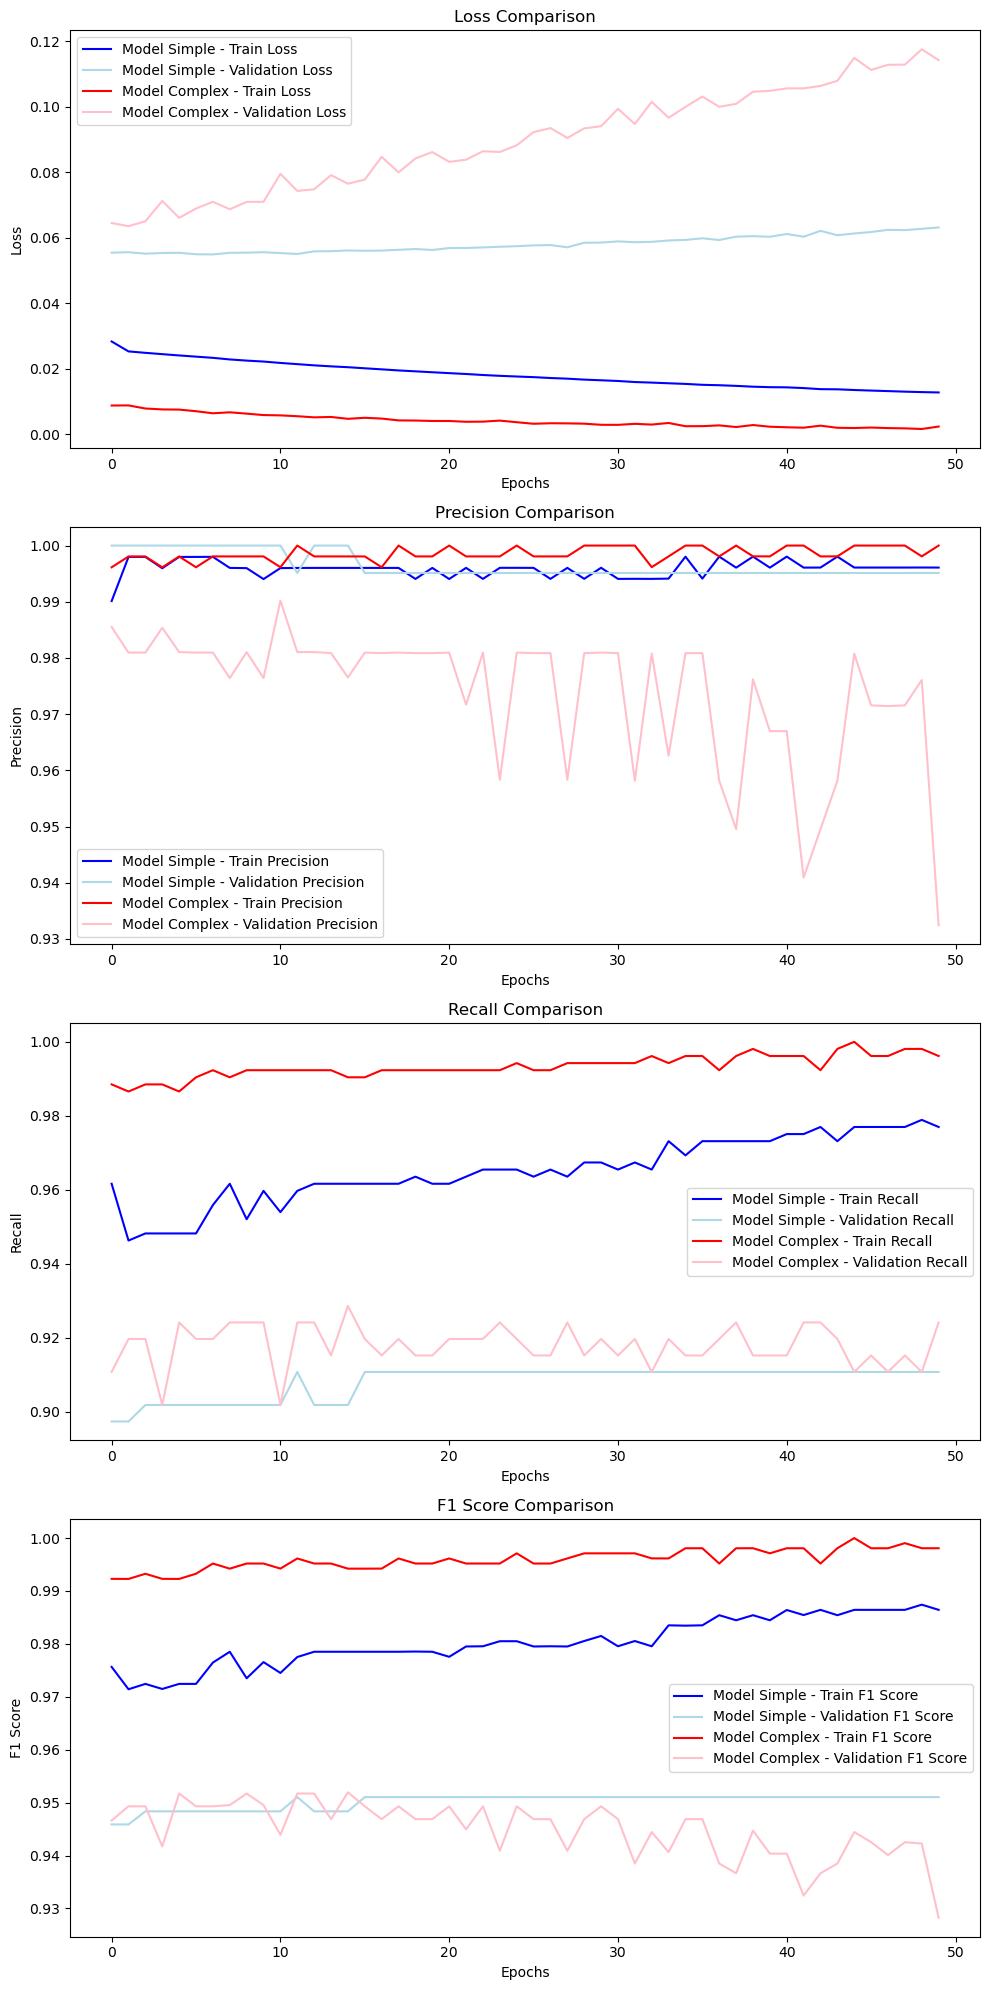

In [54]:
# Create a 4x1 grid of subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Plot 'loss' for both models on the same subplot
axs[0].plot(history_over.history['loss'], color='blue', label='Model Simple - Train Loss')
axs[0].plot(history_over.history['val_loss'], color='lightblue', label='Model Simple - Validation Loss')
axs[0].plot(history_complex_over.history['loss'], color='red', label='Model Complex - Train Loss')
axs[0].plot(history_complex_over.history['val_loss'], color='pink', label='Model Complex - Validation Loss')
axs[0].set_title('Loss Comparison')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot 'precision' for both models
axs[1].plot(history_over.history['precision'], color='blue', label='Model Simple - Train Precision')
axs[1].plot(history_over.history['val_precision'], color='lightblue', label='Model Simple - Validation Precision')
axs[1].plot(history_complex_over.history['precision'], color='red', label='Model Complex - Train Precision')
axs[1].plot(history_complex_over.history['val_precision'], color='pink', label='Model Complex - Validation Precision')
axs[1].set_title('Precision Comparison')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Precision')
axs[1].legend()

# Repeat for 'recall'
axs[2].plot(history_over.history['recall'], color='blue', label='Model Simple - Train Recall')
axs[2].plot(history_over.history['val_recall'], color='lightblue', label='Model Simple - Validation Recall')
axs[2].plot(history_complex_over.history['recall'], color='red', label='Model Complex - Train Recall')
axs[2].plot(history_complex_over.history['val_recall'], color='pink', label='Model Complex - Validation Recall')
axs[2].set_title('Recall Comparison')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Recall')
axs[2].legend()

# Repeat for 'f1_score'
axs[3].plot(history_over.history['f1_score'], color='blue', label='Model Simple - Train F1 Score')
axs[3].plot(history_over.history['val_f1_score'], color='lightblue', label='Model Simple - Validation F1 Score')
axs[3].plot(history_complex_over.history['f1_score'], color='red', label='Model Complex - Train F1 Score')
axs[3].plot(history_complex_over.history['val_f1_score'], color='pink', label='Model Complex - Validation F1 Score')
axs[3].set_title('F1 Score Comparison')
axs[3].set_xlabel('Epochs')
axs[3].set_ylabel('F1 Score')
axs[3].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()



## 9.4 L1 Model oversampled

In [55]:
# Compiling the model
# The model uses binary cross-entropy as the loss function, suitable for binary classification tasks
# Metrics include True Positives, True Negatives, False Negatives, False Positives, Recall, Precision, and the custom F1 Score
optimizer_complex_l1_over = tf.keras.optimizers.Adam()
model_complex_l1.compile(optimizer=optimizer_complex_l1_over,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                  tf.keras.metrics.TruePositives(name="tp"),
                  tf.keras.metrics.TrueNegatives(name="tn"),
                  tf.keras.metrics.FalseNegatives(name="fn"),
                  tf.keras.metrics.FalsePositives(name="fp"),
                  tf.keras.metrics.Recall(name="recall"),
                  tf.keras.metrics.Precision(name="precision"),
                  F1Score(),
                  Accuracy()
              ])

In [56]:
# Training the model
history_complex_l1_over = model_complex_l1.fit(
    train_batch_re,  # Training data: the model will be trained on this data
    epochs=50,  # Number of epochs: the number of times the model will go through the entire training dataset
    validation_data=val_batch,  # Validation data: used to evaluate the model at the end of each epoch
    #class_weight=weights  # Class weights: used to give different importance to classes
)

Epoch 1/50
60/60 [==============================] - 2s 11ms/step - loss: 0.1535 - tp: 468.0000 - tn: 3266.0000 - fn: 53.0000 - fp: 2.0000 - recall: 0.8983 - precision: 0.9957 - f1_score: 0.9445 - accuracy: 0.9855 - val_loss: 0.1628 - val_tp: 190.0000 - val_tn: 1401.0000 - val_fn: 34.0000 - val_fp: 0.0000e+00 - val_recall: 0.8482 - val_precision: 1.0000 - val_f1_score: 0.9179 - val_accuracy: 0.9791
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1470 - tp: 460.0000 - tn: 3266.0000 - fn: 61.0000 - fp: 2.0000 - recall: 0.8829 - precision: 0.9957 - f1_score: 0.9359 - accuracy: 0.9834 - val_loss: 0.1594 - val_tp: 190.0000 - val_tn: 1401.0000 - val_fn: 34.0000 - val_fp: 0.0000e+00 - val_recall: 0.8482 - val_precision: 1.0000 - val_f1_score: 0.9179 - val_accuracy: 0.9791
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1440 - tp: 457.0000 - tn: 3266.0000 - fn: 64.0000 - fp: 2.0000 - recall: 0.8772 - precision: 0.9956 - f1_score: 0.9327 - accu

## 9.5 L2 Model oversampled

In [57]:
# Compiling the model
# The model uses binary cross-entropy as the loss function, suitable for binary classification tasks
# Metrics include True Positives, True Negatives, False Negatives, False Positives, Recall, Precision, and the custom F1 Score
optimizer_complex_l2_over = tf.keras.optimizers.Adam()
model_complex_l2.compile(optimizer=optimizer_complex_l2_over,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                  tf.keras.metrics.TruePositives(name="tp"),
                  tf.keras.metrics.TrueNegatives(name="tn"),
                  tf.keras.metrics.FalseNegatives(name="fn"),
                  tf.keras.metrics.FalsePositives(name="fp"),
                  tf.keras.metrics.Recall(name="recall"),
                  tf.keras.metrics.Precision(name="precision"),
                  F1Score(),
                  Accuracy()
              ])

In [58]:
# Training the model
history_complex_l2_over = model_complex_l2.fit(
    train_batch_re,  # Training data: the model will be trained on this data
    epochs=50,  # Number of epochs: the number of times the model will go through the entire training dataset
    validation_data=val_batch,  # Validation data: used to evaluate the model at the end of each epoch
    #class_weight=weights  # Class weights: used to give different importance to classes
)

Epoch 1/50
60/60 [==============================] - 2s 18ms/step - loss: 0.1394 - tp: 452.0000 - tn: 3266.0000 - fn: 69.0000 - fp: 2.0000 - recall: 0.8676 - precision: 0.9956 - f1_score: 0.9272 - accuracy: 0.9813 - val_loss: 0.1407 - val_tp: 191.0000 - val_tn: 1400.0000 - val_fn: 33.0000 - val_fp: 1.0000 - val_recall: 0.8527 - val_precision: 0.9948 - val_f1_score: 0.9183 - val_accuracy: 0.9791
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1273 - tp: 449.0000 - tn: 3266.0000 - fn: 72.0000 - fp: 2.0000 - recall: 0.8618 - precision: 0.9956 - f1_score: 0.9239 - accuracy: 0.9805 - val_loss: 0.1347 - val_tp: 186.0000 - val_tn: 1401.0000 - val_fn: 38.0000 - val_fp: 0.0000e+00 - val_recall: 0.8304 - val_precision: 1.0000 - val_f1_score: 0.9073 - val_accuracy: 0.9766
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1232 - tp: 445.0000 - tn: 3266.0000 - fn: 76.0000 - fp: 2.0000 - recall: 0.8541 - precision: 0.9955 - f1_score: 0.9194 - accuracy

## 9.6 Models' performances

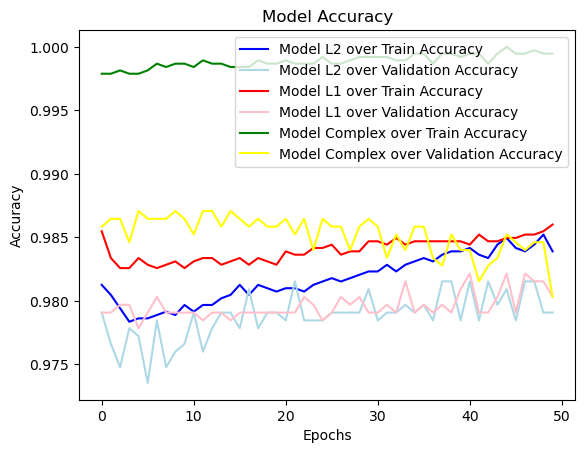

In [59]:
# Plotting training and validation accuracy
plt.plot(history_complex_l2_over.history['accuracy'], color='blue', label='Model L2 over Train Accuracy')
plt.plot(history_complex_l2_over.history['val_accuracy'], color='lightblue', label='Model L2 over Validation Accuracy')
plt.plot(history_complex_l1_over.history['accuracy'], color='red', label='Model L1 over Train Accuracy')
plt.plot(history_complex_l1_over.history['val_accuracy'], color='pink', label='Model L1 over Validation Accuracy')
plt.plot(history_complex_over.history['accuracy'], color='green', label='Model Complex over Train Accuracy')
plt.plot(history_complex_over.history['val_accuracy'], color='yellow', label='Model Complex over Validation Accuracy')


# Adding title and labels
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Adding legend
plt.legend()

# Display the plot
plt.show()

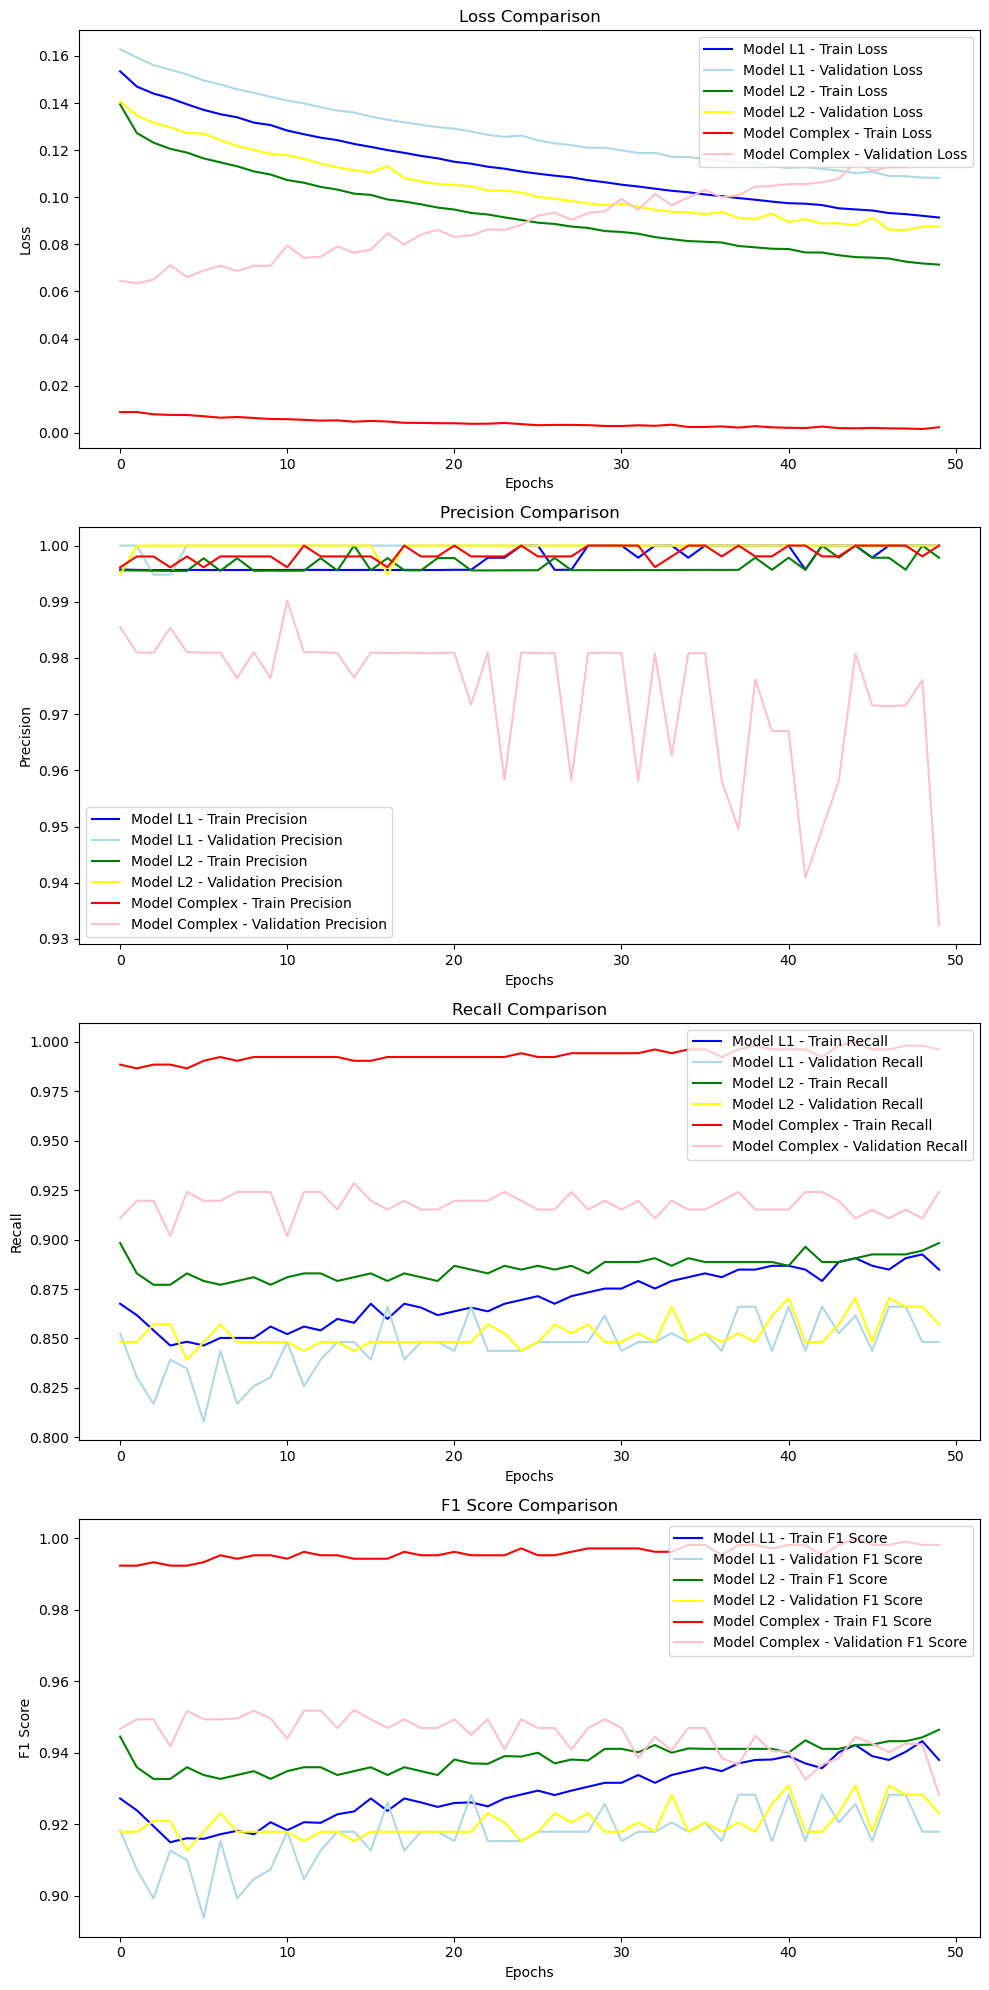

In [60]:
# Create a 4x1 grid of subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Plot 'loss' for both models on the same subplot
axs[0].plot(history_complex_l1_over.history['loss'], color='blue', label='Model L1 - Train Loss')
axs[0].plot(history_complex_l1_over.history['val_loss'], color='lightblue', label='Model L1 - Validation Loss')
axs[0].plot(history_complex_l2_over.history['loss'], color='green', label='Model L2 - Train Loss')
axs[0].plot(history_complex_l2_over.history['val_loss'], color='yellow', label='Model L2 - Validation Loss')
axs[0].plot(history_complex_over.history['loss'], color='red', label='Model Complex - Train Loss')
axs[0].plot(history_complex_over.history['val_loss'], color='pink', label='Model Complex - Validation Loss')
axs[0].set_title('Loss Comparison')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot 'precision' for both models
axs[1].plot(history_complex_l1_over.history['precision'], color='blue', label='Model L1 - Train Precision')
axs[1].plot(history_complex_l1_over.history['val_precision'], color='lightblue', label='Model L1 - Validation Precision')
axs[1].plot(history_complex_l2_over.history['precision'], color='green', label='Model L2 - Train Precision')
axs[1].plot(history_complex_l2_over.history['val_precision'], color='yellow', label='Model L2 - Validation Precision')
axs[1].plot(history_complex_over.history['precision'], color='red', label='Model Complex - Train Precision')
axs[1].plot(history_complex_over.history['val_precision'], color='pink', label='Model Complex - Validation Precision')
axs[1].set_title('Precision Comparison')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Precision')
axs[1].legend()

# Repeat for 'recall'
axs[2].plot(history_complex_l2_over.history['recall'], color='blue', label='Model L1 - Train Recall')
axs[2].plot(history_complex_l2_over.history['val_recall'], color='lightblue', label='Model L1 - Validation Recall')
axs[2].plot(history_complex_l1_over.history['recall'], color='green', label='Model L2 - Train Recall')
axs[2].plot(history_complex_l1_over.history['val_recall'], color='yellow', label='Model L2 - Validation Recall')
axs[2].plot(history_complex_over.history['recall'], color='red', label='Model Complex - Train Recall')
axs[2].plot(history_complex_over.history['val_recall'], color='pink', label='Model Complex - Validation Recall')
axs[2].set_title('Recall Comparison')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Recall')
axs[2].legend()

# Repeat for 'f1_score'
axs[3].plot(history_complex_l2_over.history['f1_score'], color='blue', label='Model L1 - Train F1 Score')
axs[3].plot(history_complex_l2_over.history['val_f1_score'], color='lightblue', label='Model L1 - Validation F1 Score')
axs[3].plot(history_complex_l1_over.history['f1_score'], color='green', label='Model L2 - Train F1 Score')
axs[3].plot(history_complex_l1_over.history['val_f1_score'], color='yellow', label='Model L2 - Validation F1 Score')
axs[3].plot(history_complex_over.history['f1_score'], color='red', label='Model Complex - Train F1 Score')
axs[3].plot(history_complex_over.history['val_f1_score'], color='pink', label='Model Complex - Validation F1 Score')
axs[3].set_title('F1 Score Comparison')
axs[3].set_xlabel('Epochs')
axs[3].set_ylabel('F1 Score')
axs[3].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

Following the application of oversampling, the model with a single hidden layer is exhibiting pronounced overfitting. This is indicated by a perfect F1Score of 1 for the training set and a comparatively lower F1Score for the validation set. For the models with regularization, both are showing similar performance levels. However, the model employing L2 regularization is slightly ahead in terms of a lower loss.

# 10. Conclusion

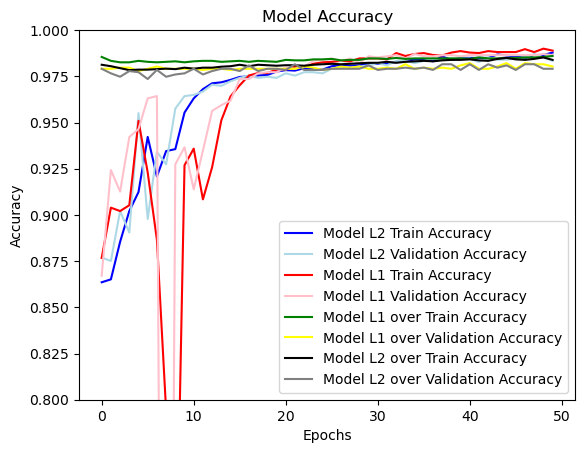

In [61]:
# Plotting training and validation accuracy
plt.plot(history_complex_l2.history['accuracy'], color='blue', label='Model L2 Train Accuracy')
plt.plot(history_complex_l2.history['val_accuracy'], color='lightblue', label='Model L2 Validation Accuracy')
plt.plot(history_complex_l1.history['accuracy'], color='red', label='Model L1 Train Accuracy')
plt.plot(history_complex_l1.history['val_accuracy'], color='pink', label='Model L1 Validation Accuracy')
plt.plot(history_complex_l1_over.history['accuracy'], color='green', label='Model L1 over Train Accuracy')
plt.plot(history_complex_l1_over.history['val_accuracy'], color='yellow', label='Model L1 over Validation Accuracy')
plt.plot(history_complex_l2_over.history['accuracy'], color='black', label='Model L2 over Train Accuracy')
plt.plot(history_complex_l2_over.history['val_accuracy'], color='grey', label='Model L2 over Validation Accuracy')


# Adding title and labels
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Setting the y-axis limits to only show between 0.8 and 1
plt.ylim(0.8, 1)

# Adding legend
plt.legend()

# Display the plot
plt.show()

The results suggest that models trained with oversampled data tend to overfit, which is apparent from their accuracy nearing 1. Basic models, on the other hand, demonstrate improvement, reaching acceptable levels of performance after a number of epochs, but eventually start to exhibit signs of overfitting.

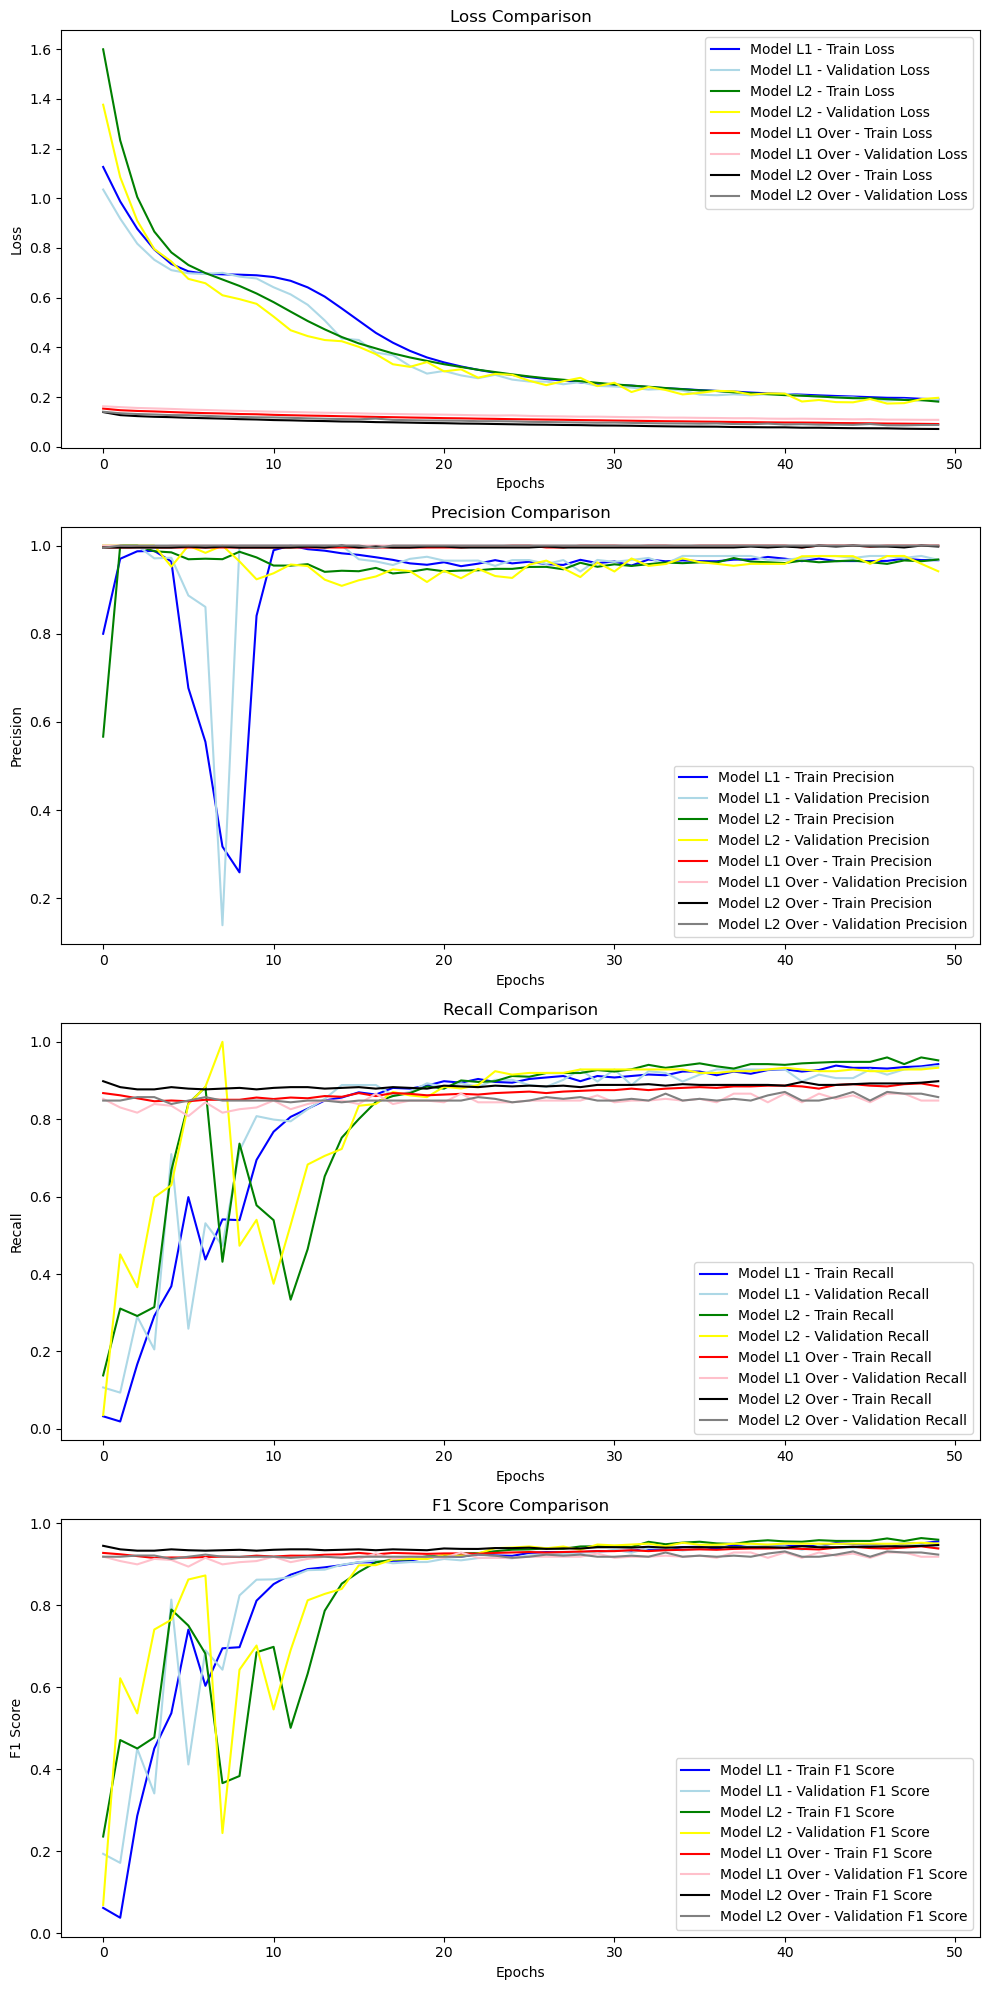

In [62]:
# Create a 4x1 grid of subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Plot 'loss' for both models on the same subplot
axs[0].plot(history_complex_l1.history['loss'], color='blue', label='Model L1 - Train Loss')
axs[0].plot(history_complex_l1.history['val_loss'], color='lightblue', label='Model L1 - Validation Loss')
axs[0].plot(history_complex_l2.history['loss'], color='green', label='Model L2 - Train Loss')
axs[0].plot(history_complex_l2.history['val_loss'], color='yellow', label='Model L2 - Validation Loss')
axs[0].plot(history_complex_l1_over.history['loss'], color='red', label='Model L1 Over - Train Loss')
axs[0].plot(history_complex_l1_over.history['val_loss'], color='pink', label='Model L1 Over - Validation Loss')
axs[0].plot(history_complex_l2_over.history['loss'], color='black', label='Model L2 Over - Train Loss')
axs[0].plot(history_complex_l2_over.history['val_loss'], color='grey', label='Model L2 Over - Validation Loss')
axs[0].set_title('Loss Comparison')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot 'precision' for both models
axs[1].plot(history_complex_l1.history['precision'], color='blue', label='Model L1 - Train Precision')
axs[1].plot(history_complex_l1.history['val_precision'], color='lightblue', label='Model L1 - Validation Precision')
axs[1].plot(history_complex_l2.history['precision'], color='green', label='Model L2 - Train Precision')
axs[1].plot(history_complex_l2.history['val_precision'], color='yellow', label='Model L2 - Validation Precision')
axs[1].plot(history_complex_l1_over.history['precision'], color='red', label='Model L1 Over - Train Precision')
axs[1].plot(history_complex_l1_over.history['val_precision'], color='pink', label='Model L1 Over - Validation Precision')
axs[1].plot(history_complex_l2_over.history['precision'], color='black', label='Model L2 Over - Train Precision')
axs[1].plot(history_complex_l2_over.history['val_precision'], color='grey', label='Model L2 Over - Validation Precision')
axs[1].set_title('Precision Comparison')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Precision')
axs[1].legend()

# Repeat for 'recall'
axs[2].plot(history_complex_l2.history['recall'], color='blue', label='Model L1 - Train Recall')
axs[2].plot(history_complex_l2.history['val_recall'], color='lightblue', label='Model L1 - Validation Recall')
axs[2].plot(history_complex_l1.history['recall'], color='green', label='Model L2 - Train Recall')
axs[2].plot(history_complex_l1.history['val_recall'], color='yellow', label='Model L2 - Validation Recall')
axs[2].plot(history_complex_l2_over.history['recall'], color='red', label='Model L1 Over - Train Recall')
axs[2].plot(history_complex_l2_over.history['val_recall'], color='pink', label='Model L1 Over - Validation Recall')
axs[2].plot(history_complex_l1_over.history['recall'], color='black', label='Model L2 Over - Train Recall')
axs[2].plot(history_complex_l1_over.history['val_recall'], color='grey', label='Model L2 Over - Validation Recall')
axs[2].set_title('Recall Comparison')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Recall')
axs[2].legend()

# Repeat for 'f1_score'
axs[3].plot(history_complex_l2.history['f1_score'], color='blue', label='Model L1 - Train F1 Score')
axs[3].plot(history_complex_l2.history['val_f1_score'], color='lightblue', label='Model L1 - Validation F1 Score')
axs[3].plot(history_complex_l1.history['f1_score'], color='green', label='Model L2 - Train F1 Score')
axs[3].plot(history_complex_l1.history['val_f1_score'], color='yellow', label='Model L2 - Validation F1 Score')
axs[3].plot(history_complex_l2_over.history['f1_score'], color='red', label='Model L1 Over - Train F1 Score')
axs[3].plot(history_complex_l2_over.history['val_f1_score'], color='pink', label='Model L1 Over - Validation F1 Score')
axs[3].plot(history_complex_l1_over.history['f1_score'], color='black', label='Model L2 Over - Train F1 Score')
axs[3].plot(history_complex_l1_over.history['val_f1_score'], color='grey', label='Model L2 Over - Validation F1 Score')
axs[3].set_title('F1 Score Comparison')
axs[3].set_xlabel('Epochs')
axs[3].set_ylabel('F1 Score')
axs[3].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

The data indicates that models trained on oversampled data are prone to overfitting, as evidenced by the F1Score for the training set approaching 1. The fundamental models show progress, achieving satisfactory results after several epochs before beginning to overfit. Based on these outcomes, efforts should concentrate on refining the models to mitigate overfitting and exploring alternative strategies to address class imbalance. Considering these factors, my preference would lean towards the model with L1 regularization.

26/26 [==============================] - 0s 682us/step


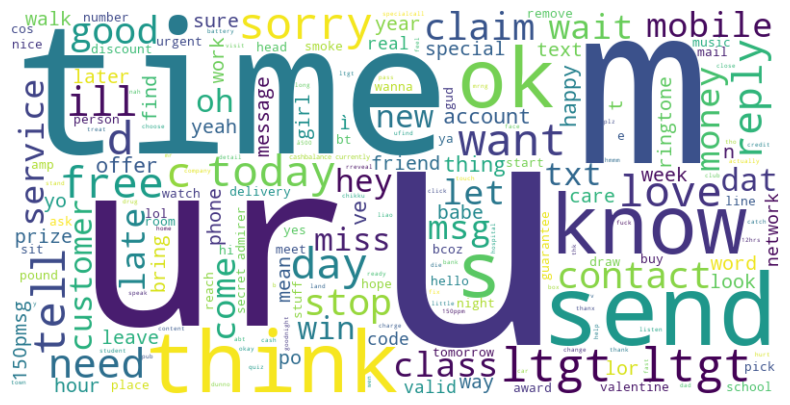

In [63]:
# Predictions from the model
predictions = model_complex_l1.predict(val_batch)

# Finding the indice where the model predicted 'spam'
spam_indices = [i for i, prediction in enumerate(predictions) if prediction > 0.5]

# Extract spam messages
enc_spam_messages = [data_pad[i] for i in spam_indices]
spam_messages = tokenizer.sequences_to_texts(enc_spam_messages)

# Combine all spam messages into a single string
spam_text = " ".join(spam_messages)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


From the selected model, presented here is the word cloud for instances classified as spam in the validation set.